# Gait Score Binaire

C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 8ms/step - loss: 0.6465 - accuracy: 0.7681
Loss : 0.6464571356773376
Accuracy : 0.7681159377098083
3/3 [==============================] - 0s 2ms/step


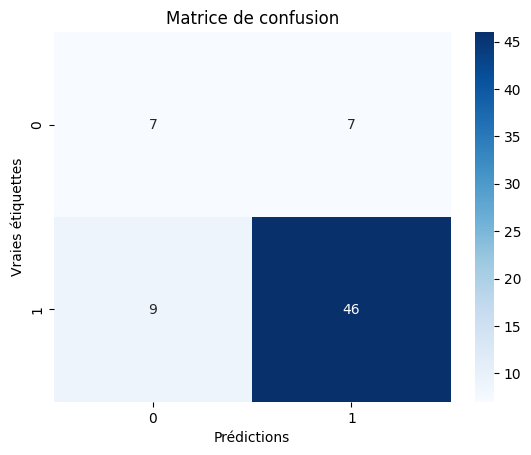

Report score combiné : 
               precision    recall  f1-score   support

           0       0.44      0.50      0.47        14
           1       0.87      0.84      0.85        55

    accuracy                           0.77        69
   macro avg       0.65      0.67      0.66        69
weighted avg       0.78      0.77      0.77        69



C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 1ms/step - loss: 0.7677 - accuracy: 0.6232
Loss : 0.7676724791526794
Accuracy : 0.6231883764266968
3/3 [==============================] - 0s 0s/step


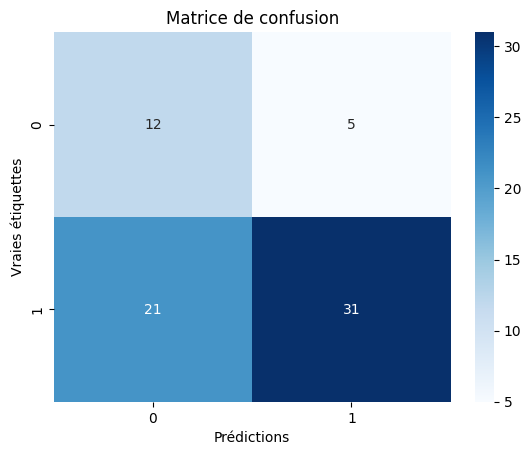

Report score combiné : 
               precision    recall  f1-score   support

           0       0.36      0.71      0.48        17
           1       0.86      0.60      0.70        52

    accuracy                           0.62        69
   macro avg       0.61      0.65      0.59        69
weighted avg       0.74      0.62      0.65        69



C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 0s/step - loss: 0.7529 - accuracy: 0.6912
Loss : 0.7529330253601074
Accuracy : 0.6911764740943909
3/3 [==============================] - 0s 0s/step


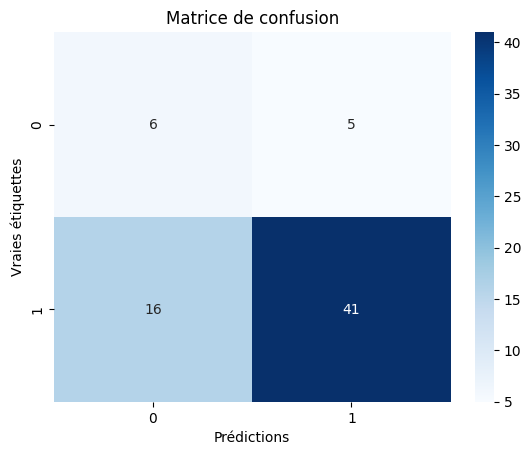

Report score combiné : 
               precision    recall  f1-score   support

           0       0.27      0.55      0.36        11
           1       0.89      0.72      0.80        57

    accuracy                           0.69        68
   macro avg       0.58      0.63      0.58        68
weighted avg       0.79      0.69      0.73        68



C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 0s/step - loss: 0.6072 - accuracy: 0.8235
Loss : 0.6071906089782715
Accuracy : 0.8235294222831726
3/3 [==============================] - 0s 8ms/step


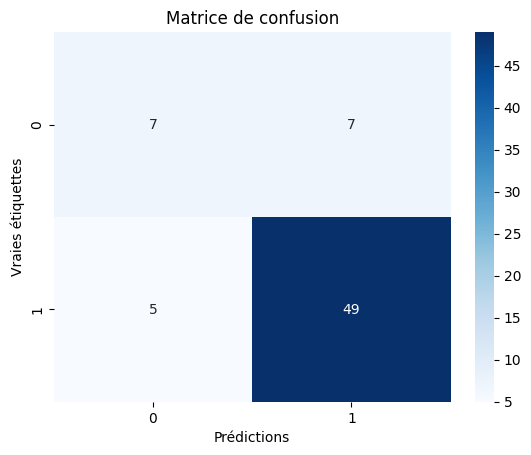

Report score combiné : 
               precision    recall  f1-score   support

           0       0.58      0.50      0.54        14
           1       0.88      0.91      0.89        54

    accuracy                           0.82        68
   macro avg       0.73      0.70      0.71        68
weighted avg       0.81      0.82      0.82        68



C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 0s/step - loss: 0.7247 - accuracy: 0.6029
Loss : 0.7246885299682617
Accuracy : 0.6029411554336548
3/3 [==============================] - 0s 0s/step


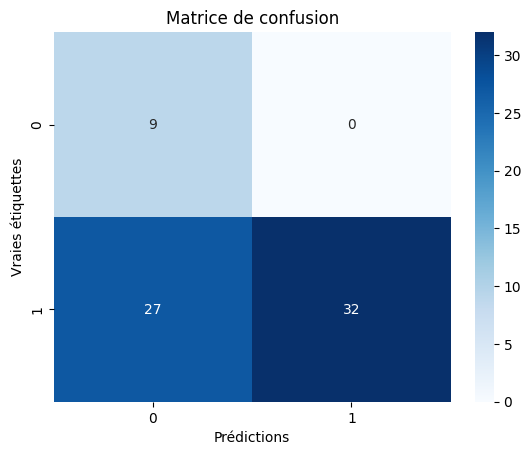

Report score combiné : 
               precision    recall  f1-score   support

           0       0.25      1.00      0.40         9
           1       1.00      0.54      0.70        59

    accuracy                           0.60        68
   macro avg       0.62      0.77      0.55        68
weighted avg       0.90      0.60      0.66        68



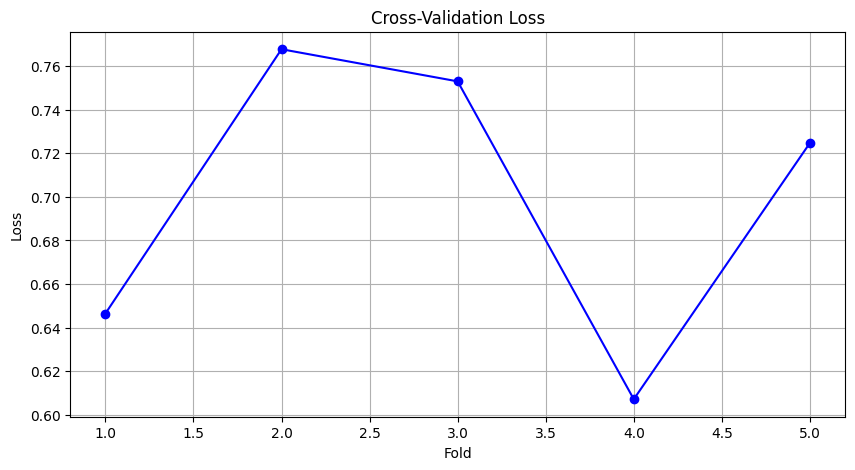

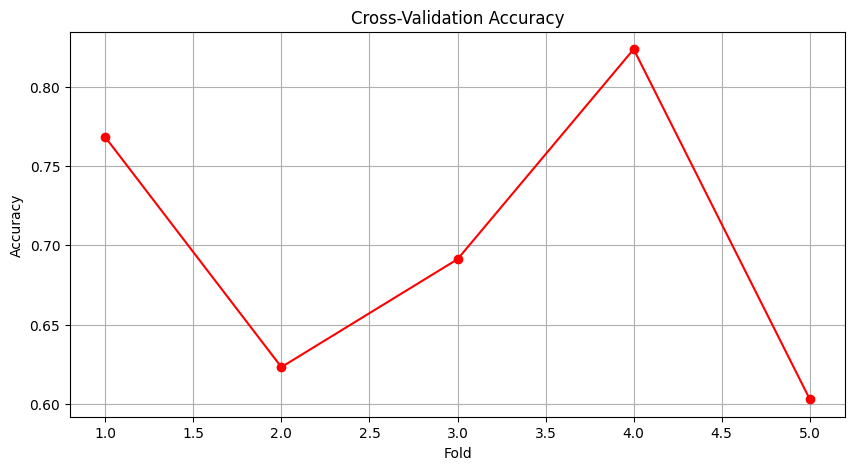


Average Loss: 0.6997883558273316
Average Accuracy: 0.7017902731895447

STD Loss: 0.06240383086935829
STD Accuracy: 0.08400187281622072


'importances.append(88.01-100*np.mean(accuracies))\nimportances_std.append(np.std(accuracies))\n\nfor i in range(len(importances)):\n    print("Feature ",i," manquant: accuracy = ",importances[i], " | std = ",importances_std[i])'

In [3]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, Adamax
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.inspection import permutation_importance
from sklearn.base import BaseEstimator, ClassifierMixin
import os

donnees = pd.read_excel('Results.xlsx', sheet_name='4BPs') # Choose the .xlsx file and its sheet (Sheet represents the joints combination to classify)

importances = []
importances_std = []
#for ask in range(41):
y_score = donnees.iloc[:,2].values # Extract the gait scores
y_score = y_score[~pd.isna(y_score)]
y_diag = donnees.iloc[:,3].values # Extract the diagnosis
y_diag = y_diag[~pd.isna(y_diag)]
y_binaire = [] # Will be filled if we want to modify labels (binary regular/irregular, AD vs DLB, healthy/sick classifications)
X_nom = donnees.iloc[:,0].values.reshape(-1, 1)
X_nom2 = donnees.iloc[:,1].values.reshape(-1, 1)
X_nom2[:,0] = X_nom2[:,0]
X_nom2 = X_nom2.astype(str)
for i in range(X_nom.shape[0]):
    X_nom[i,0] = X_nom[i,0]+"_"+X_nom2[i,0]


# Data extraction. "a" represents the complexity measures column in "Results.xlsx".
for a in range(4,38): # Modify the range to choose the complexity measures (Here we analyze "4BPs")
        if a!=30 and a!=33: # Choose the complexity measures columns of "Results.xslx" you want to remove (Here we removed both right and left C_arms)
                measure = donnees.iloc[:, a].values
                measure = measure[~pd.isna(measure)]
                X_nom = np.column_stack((X_nom, measure))
        """else:
            print(donnees.columns[a])"""
X = X_nom[:,1:]

# Modify the labels (here the example is for a binary gait score regluar/irregular)
for i in y_score:
    if i == 0:
        y_binaire.append(0)
    else:
        y_binaire.append(1)

X = X.astype(np.float32)
y_binaire = np.array(y_binaire)
y_binaire = y_binaire.astype(int)

kf = KFold(n_splits=5, shuffle=True, random_state=42) # 5-Folds division: You can modify this number

losses = []
accuracies = []

# Cross-validation
for train_index, test_index in kf.split(X): 
    if os.path.exists('best_model.h5'): # Keep best classification results
        os.remove('best_model.h5')
    checkpoint = ModelCheckpoint(
        'best_model.h5',               
        monitor='val_accuracy',       
        verbose=0,                    
        save_best_only=True,         
        mode='max'                   
    )
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_binaire[train_index], y_binaire[test_index]
    
    # Data normalization
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=2)
    y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=2)


    # Neural network definition: you can modify number of neurons and activation function
    """model = Sequential([
        Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(8, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])"""
    model = Sequential([
        Dense(10, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(6, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])

    model.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])

    # Model training: you can modify parameters and labels weigths
    history = model.fit(X_train_scaled, y_train_one_hot, epochs=200, batch_size=8, validation_data=(X_test_scaled, y_test_one_hot), callbacks=[checkpoint], verbose=0, class_weight={0: 4, 1: 1})

    # Model evaluation
    model.load_weights('best_model.h5')
    model = load_model('best_model.h5')
    loss, accuracy = model.evaluate(X_test_scaled, y_test_one_hot)
    print("Loss :", loss)
    print("Accuracy :", accuracy)

    losses.append(loss)
    accuracies.append(accuracy)

    # Predictions
    y_pred = np.argmax(model.predict(X_test_scaled), axis=1)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=["0", "1"], yticklabels=["0", "1"])
    plt.xlabel("Prédictions")
    plt.ylabel("Vraies étiquettes")
    plt.title("Matrice de confusion")
    plt.show()
    print("Report score combiné : \n",classification_report(y_test, y_pred))

    # Loss and accuracy 
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(train_loss) + 1)

    """# Loss' Plot 
    plt.plot(epochs, train_loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Accuracy's plot
    plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()"""
    
# Mean cross-validation loss' plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(losses) + 1), losses, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Loss')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Mean cross-validation accuracy's plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', linestyle='-', color='r')
plt.title('Cross-Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Performances display
print("\nAverage Loss:", np.mean(losses))
print("Average Accuracy:", np.mean(accuracies))
print("\nSTD Loss:", np.std(losses))
print("STD Accuracy:", np.std(accuracies))

"""importances.append(88.01-100*np.mean(accuracies))
importances_std.append(np.std(accuracies))

for i in range(len(importances)):
    print("Feature ",i," manquant: accuracy = ",importances[i], " | std = ",importances_std[i])"""




       


# Mann-Whitney


In [16]:
import numpy as np
from scipy.stats import mannwhitneyu

# Définir les échantillons
sample_bras_gs = [69.57,75.36,72.06,79.41,67.65,59.72,77.78,68.08,63.89,68.49]
sample_jambe_gs = [79.41,79.41,81.12,79.71,76.81,83.33,79.17,84.72,73.61,82.19]
sample_bras_AD = [71.88,68.75,71.88,75,79.69,67.34,71.64,73.13,71.64,68.66]
sample_jambe_AD = [64.06,67.19,67.19,62.5,75,65.67,70.15,64.18,65.67,73.13]

#for i, sample_B in enumerate(samples_B):
stat_gs, p_value_gs = mannwhitneyu(sample_jambe_gs, sample_bras_gs, alternative='greater')
stat_AD, p_value_AD = mannwhitneyu(sample_jambe_AD,sample_bras_AD , alternative='greater')
print('Gait Score')
print(f'p(bras>>jambes) = U-statistique = {stat_gs}, p-value = {p_value_gs}')
print('AD vs DLB')
print(f'p(bras>>jambes) = U-statistique = {stat_AD}, p-value = {p_value_AD}')

Gait Score
p(bras>>jambes) = U-statistique = 93.0, p-value = 0.000646474826756181
AD vs DLB
p(bras>>jambes) = U-statistique = 19.0, p-value = 0.9914967110992882


In [50]:
donnees = pd.read_excel('Results_v7.xlsx', sheet_name='T_set_4MS')
column_names = donnees.columns.tolist()
a=4
best_imp = []
best_imp_std = []
indices = np.argpartition(importances, -10)[-10:]
indices_std = np.argpartition(importances_std, -10)[-10:]
div=0
mean=0
mean_std=0
for i in range(len(importances)):
    if 'Height_Leg' in column_names[i+a] or '16,17,18 : length' in column_names[i+a]:
        a=a+1
    #print("Feature ",column_names[i+a],"manquant: accuracy = ",importances[i], " | std = ",importances_std[i])
    if 'cplx' in column_names[i+a]:
        print("Feature ",column_names[i+a],": accuracy = ",importances[i], " | std = ",importances_std[i])
        mean=mean+importances[i]
        mean_std=mean_std+importances_std[i]
        div = div+1
    if i in indices:
        best_imp.append(column_names[i+a])
    if i in indices_std:
        best_imp_std.append(column_names[i+a])
print("")
print((mean-0.5888569450378469)/(div-1))
print(mean_std/div)
print("")
ind = np.sort(indices)
ind_std = np.sort(indices_std)
for i in range(len(best_imp_std)):
    print(best_imp_std[i]," : ",importances_std[ind_std[i]])
print("")
for i in range(len(best_imp)):
    print(best_imp[i]," : ",importances[ind[i]])
    
    


Feature  cplx : accuracy =  1.4541614151001028  | std =  0.010106359875871739
Feature  cplx_meth2 : accuracy =  1.7525410747528127  | std =  0.014929596092582549
Feature  cplx_meth2_W0 : accuracy =  1.1685681438446096  | std =  0.01613686358488035
Feature  cplx.1 : accuracy =  1.4712083435058645  | std =  0.02894680890053259
Feature  cplx_meth2.1 : accuracy =  1.4584243392944387  | std =  0.025166512346470066
Feature  cplx_meth2_W0.1 : accuracy =  1.4626848793029836  | std =  0.021680303687551042
Feature  cplx.2 : accuracy =  2.0509207344055227  | std =  0.025920303921599996
Feature  cplx_meth2.2 : accuracy =  1.7610645389556936  | std =  0.02762773265869093
Feature  cplx_meth2_W0.2 : accuracy =  1.4584231472015432  | std =  0.01680342979702326
Feature  cplx.3 : accuracy =  0.5803322887420705  | std =  0.014638347179122595
Feature  cplx_meth2.3 : accuracy =  2.3279893493652395  | std =  0.018610625868844155
Feature  cplx_meth2_W0.3 : accuracy =  2.916224012374883  | std =  0.0230303728

# Gait Score Complet

C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 1s 8ms/step - loss: 1.5385 - accuracy: 0.6528
Loss : 1.5385444164276123
Accuracy : 0.6527777910232544
3/3 [==============================] - 0s 8ms/step


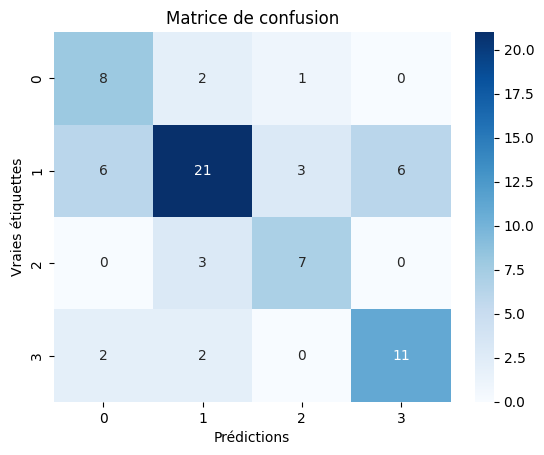

Report score combiné : 
               precision    recall  f1-score   support

           0       0.50      0.73      0.59        11
           1       0.75      0.58      0.66        36
           2       0.64      0.70      0.67        10
           3       0.65      0.73      0.69        15

    accuracy                           0.65        72
   macro avg       0.63      0.69      0.65        72
weighted avg       0.67      0.65      0.65        72



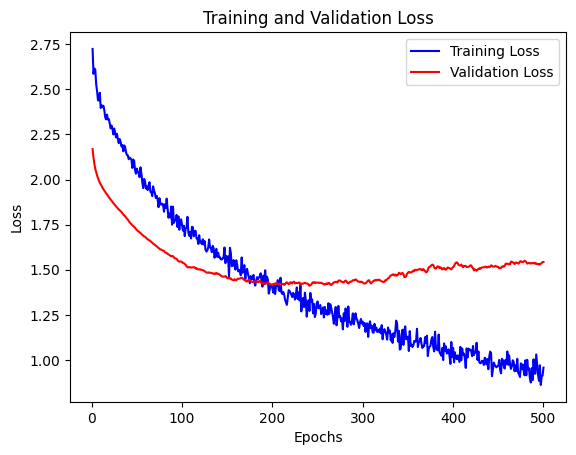

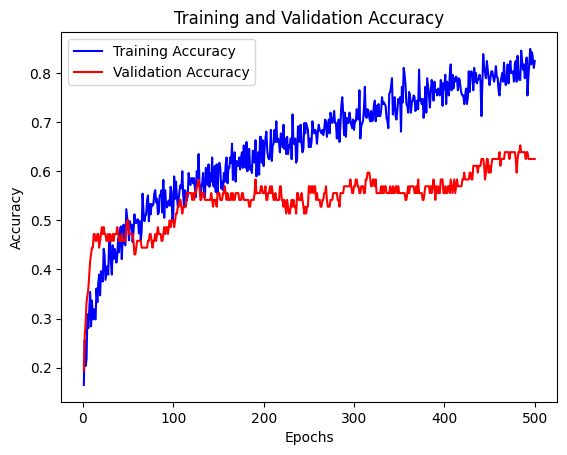

C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 9ms/step - loss: 1.7229 - accuracy: 0.5833
Loss : 1.7229338884353638
Accuracy : 0.5833333134651184
3/3 [==============================] - 0s 0s/step


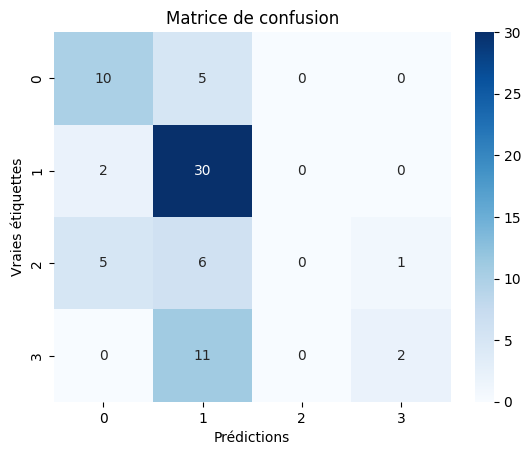

C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

Report score combiné : 
               precision    recall  f1-score   support

           0       0.59      0.67      0.62        15
           1       0.58      0.94      0.71        32
           2       0.00      0.00      0.00        12
           3       0.67      0.15      0.25        13

    accuracy                           0.58        72
   macro avg       0.46      0.44      0.40        72
weighted avg       0.50      0.58      0.49        72



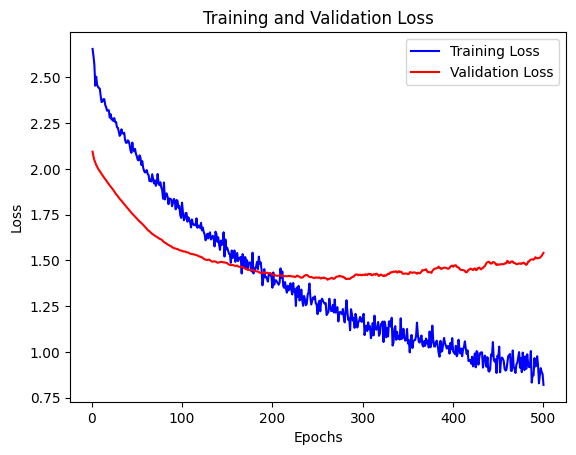

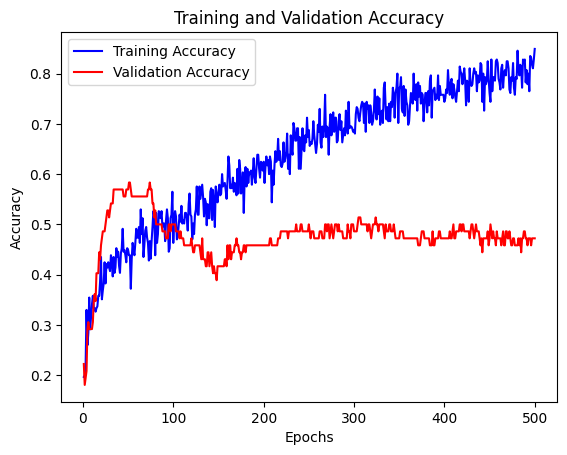

C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 1s 6ms/step - loss: 2.0209 - accuracy: 0.5211
Loss : 2.0209403038024902
Accuracy : 0.5211267471313477
3/3 [==============================] - 0s 5ms/step


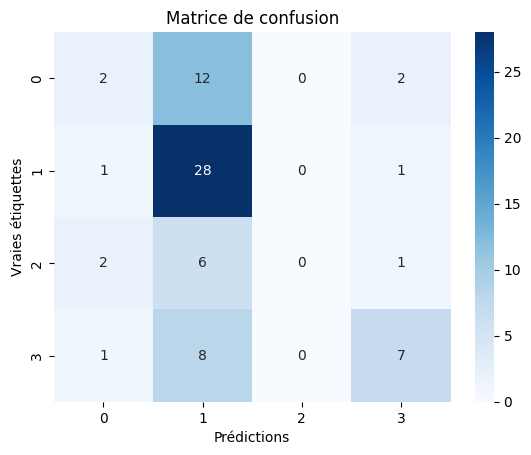

C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

Report score combiné : 
               precision    recall  f1-score   support

           0       0.33      0.12      0.18        16
           1       0.52      0.93      0.67        30
           2       0.00      0.00      0.00         9
           3       0.64      0.44      0.52        16

    accuracy                           0.52        71
   macro avg       0.37      0.37      0.34        71
weighted avg       0.44      0.52      0.44        71



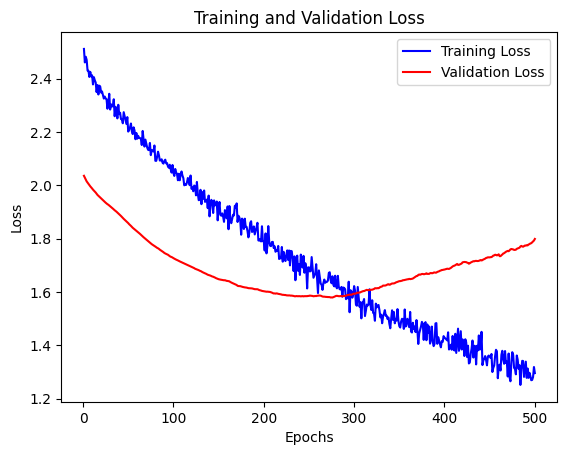

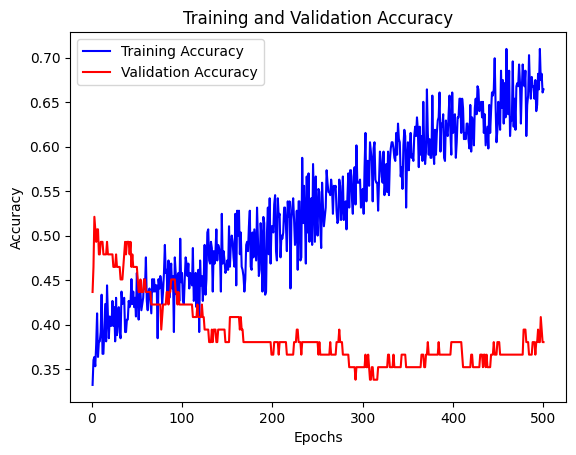

C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 1s 5ms/step - loss: 1.4827 - accuracy: 0.5352
Loss : 1.4826542139053345
Accuracy : 0.5352112650871277
3/3 [==============================] - 0s 3ms/step


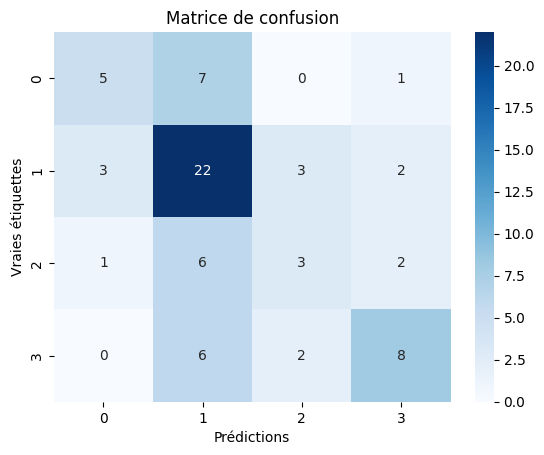

Report score combiné : 
               precision    recall  f1-score   support

           0       0.56      0.38      0.45        13
           1       0.54      0.73      0.62        30
           2       0.38      0.25      0.30        12
           3       0.62      0.50      0.55        16

    accuracy                           0.54        71
   macro avg       0.52      0.47      0.48        71
weighted avg       0.53      0.54      0.52        71



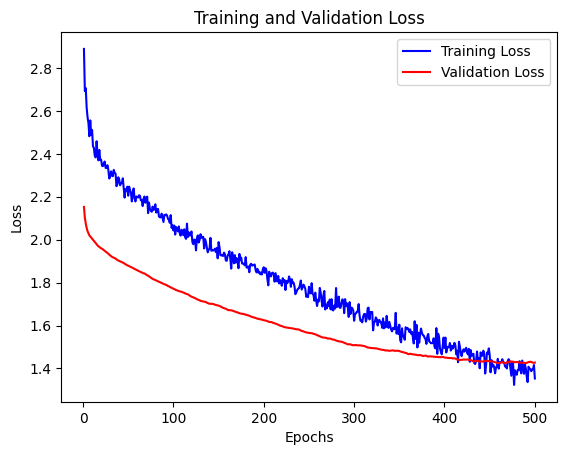

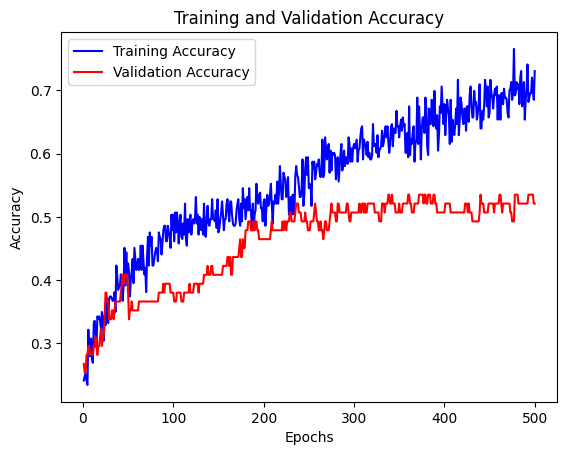

C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 6ms/step - loss: 1.5525 - accuracy: 0.4930
Loss : 1.5524672269821167
Accuracy : 0.49295774102211
3/3 [==============================] - 0s 4ms/step


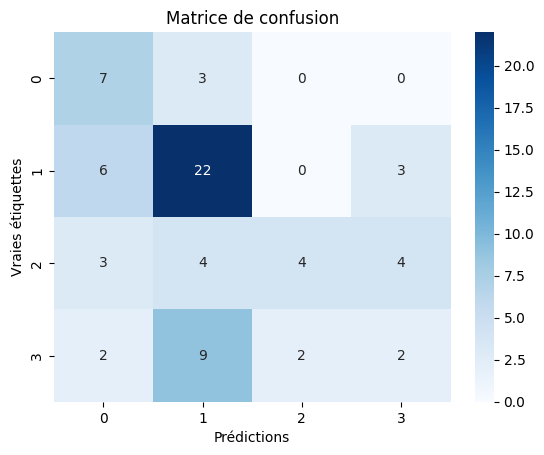

Report score combiné : 
               precision    recall  f1-score   support

           0       0.39      0.70      0.50        10
           1       0.58      0.71      0.64        31
           2       0.67      0.27      0.38        15
           3       0.22      0.13      0.17        15

    accuracy                           0.49        71
   macro avg       0.46      0.45      0.42        71
weighted avg       0.50      0.49      0.46        71



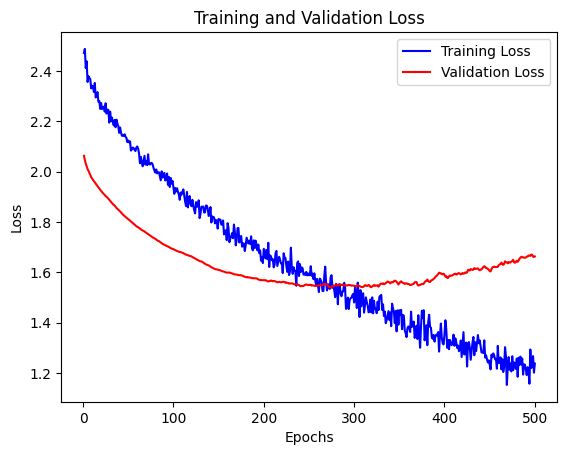

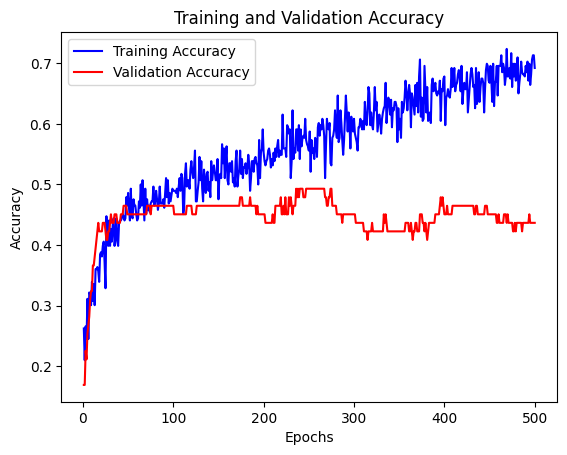

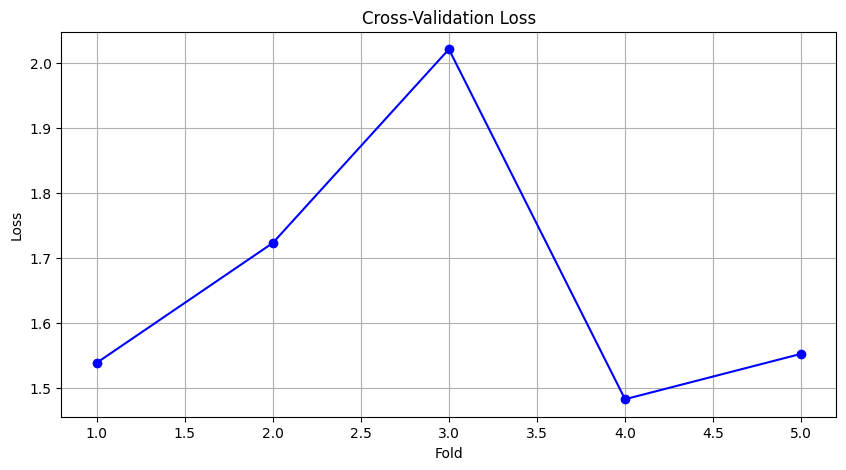

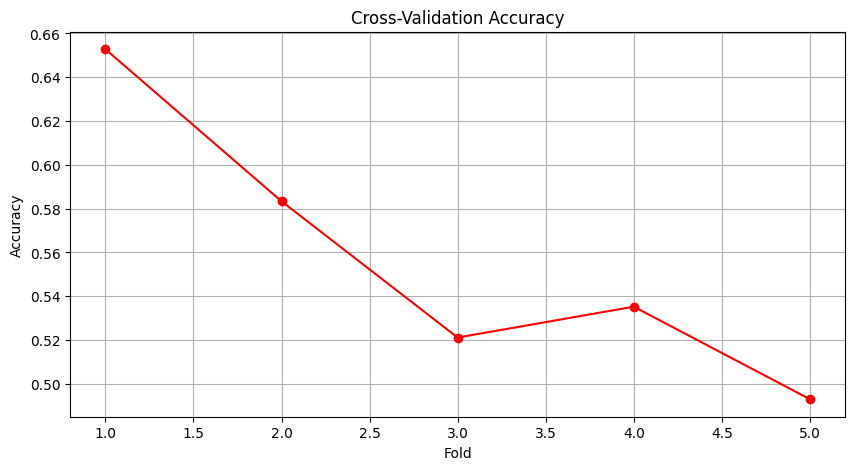


Average Loss: 1.6635080099105835
Average Accuracy: 0.5570813715457916

STD Loss: 0.1959302582320172
STD Accuracy: 0.05608893958736764


In [66]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, Adamax
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import os


donnees = pd.read_excel('Results_v7.xlsx', sheet_name='T_set_4MS')
#donnees = pd.read_excel('Results_v7_normalized_entropy.xlsx', sheet_name='T_set_4MS')
#donnees = pd.read_excel('Results_ML.xlsx')
y_score = donnees.iloc[:,2].values
y_score = y_score[~pd.isna(y_score)]
X_nom = donnees.iloc[:,0].values.reshape(-1, 1)
X_nom2 = donnees.iloc[:,1].values.reshape(-1, 1)
X_nom2 = X_nom2.astype(str)
for i in range(X_nom.shape[0]):
    X_nom[i,0] = X_nom[i,0]+"_"+X_nom2[i,0]

for a in range(4,48):
#for a in range(4,52):
        #if a!=11 and a!=26 and a!=36 and a!=42:
            measure = donnees.iloc[:, a].values
            measure = measure[~pd.isna(measure)]
            X_nom = np.column_stack((X_nom, measure))
X = X_nom[:,1:]
speed = np.mean(X[:,[3,16]], axis=1)
X[:,3]=speed
X = np.delete(X, 16, axis=1)
"""speed = np.mean(X[:,[3,17]], axis=1)
X[:,3]=speed
X = np.delete(X, 17, axis=1)"""

X = X.astype(np.float32)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
#kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Listes pour stocker les performances
losses = []
accuracies = []

# Validation croisée
for train_index, test_index in kf.split(X):
    if os.path.exists('best_model.h5'):
        os.remove('best_model.h5')
    checkpoint = ModelCheckpoint(
        'best_model.h5',               
        monitor='val_accuracy',       
        verbose=0,                    
        save_best_only=True,         
        mode='max'                   
    )
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_score[train_index], y_score[test_index]

    # Normalisation des données
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Conversion des classes de sortie en vecteurs "one-hot"
    y_train_one_hot = to_categorical(y_train, num_classes=4)
    y_test_one_hot = to_categorical(y_test, num_classes=4)

    # Définition du modèle du réseau de neurones
    model = Sequential([
        Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(8, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(4, activation='softmax')
    ])
    
    # Compilation du modèle
    model.compile(optimizer=Adamax(), loss='categorical_crossentropy', metrics=['accuracy'])


    # Entraînement du modèle
    history = model.fit(X_train_scaled, y_train_one_hot, epochs=500, batch_size=15, validation_data=(X_test_scaled, y_test_one_hot), callbacks=[checkpoint], verbose=0, class_weight={0:1.5, 1:1, 2:1.5, 3:1.5})

    # Evaluation du modèle
    model.load_weights('best_model.h5')
    model = load_model('best_model.h5')
    loss, accuracy = model.evaluate(X_test_scaled, y_test_one_hot)
    print("Loss :", loss)
    print("Accuracy :", accuracy)
    
    losses.append(loss)
    accuracies.append(accuracy)

    # Prédictions sur l'ensemble de test
    y_pred = np.argmax(model.predict(X_test_scaled), axis=1)

    # Matrice de confusion
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=["0", "1", "2", "3"], yticklabels=["0", "1", "2", "3"])
    plt.xlabel("Prédictions")
    plt.ylabel("Vraies étiquettes")
    plt.title("Matrice de confusion")
    plt.show()
    print("Report score combiné : \n",classification_report(y_test, y_pred))

    # Récupérer les valeurs de perte et d'exactitude
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(train_loss) + 1)

    # Tracer la perte
    plt.plot(epochs, train_loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Tracer l'exactitude
    plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Tracer les courbes de perte
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(losses) + 1), losses, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Loss')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Tracer les courbes d'exactitude
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', linestyle='-', color='r')
plt.title('Cross-Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Affichage des performances moyennes
print("\nAverage Loss:", np.mean(losses))
print("Average Accuracy:", np.mean(accuracies))
print("\nSTD Loss:", np.std(losses))
print("STD Accuracy:", np.std(accuracies))


# Gait score (0,1,[2;3])

C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 6ms/step - loss: 1.2480 - accuracy: 0.7083
Loss : 1.247969150543213
Accuracy : 0.7083333134651184
3/3 [==============================] - 0s 4ms/step


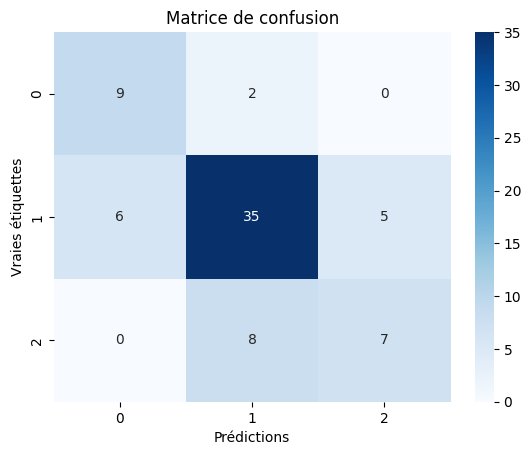

Report score combiné : 
               precision    recall  f1-score   support

           0       0.60      0.82      0.69        11
           1       0.78      0.76      0.77        46
           2       0.58      0.47      0.52        15

    accuracy                           0.71        72
   macro avg       0.65      0.68      0.66        72
weighted avg       0.71      0.71      0.71        72



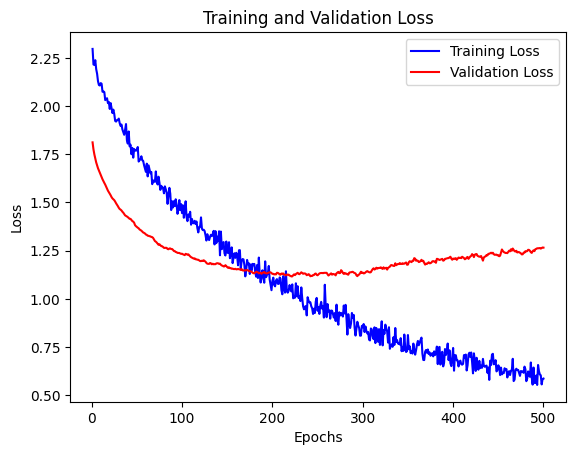

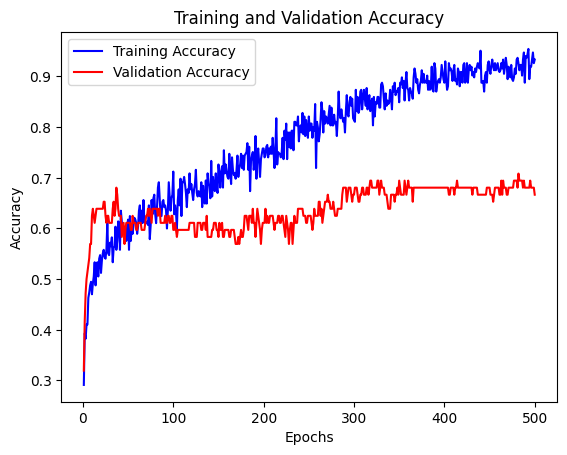

C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 6ms/step - loss: 1.2481 - accuracy: 0.6806
Loss : 1.2480891942977905
Accuracy : 0.6805555820465088
3/3 [==============================] - 0s 4ms/step


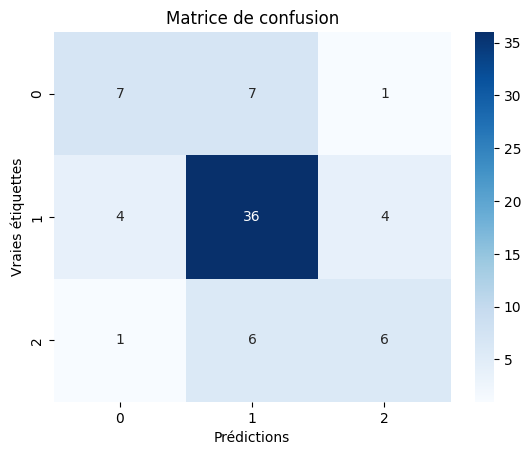

Report score combiné : 
               precision    recall  f1-score   support

           0       0.58      0.47      0.52        15
           1       0.73      0.82      0.77        44
           2       0.55      0.46      0.50        13

    accuracy                           0.68        72
   macro avg       0.62      0.58      0.60        72
weighted avg       0.67      0.68      0.67        72



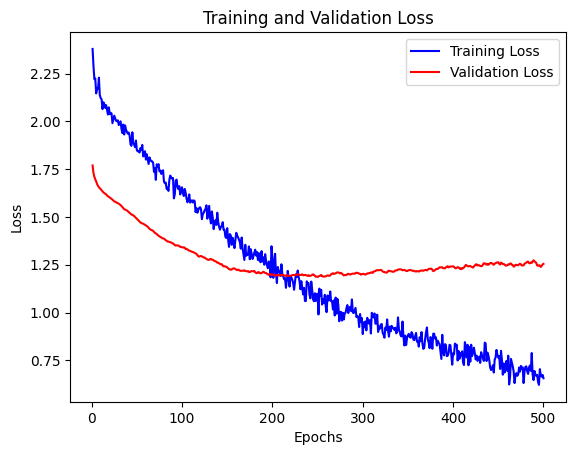

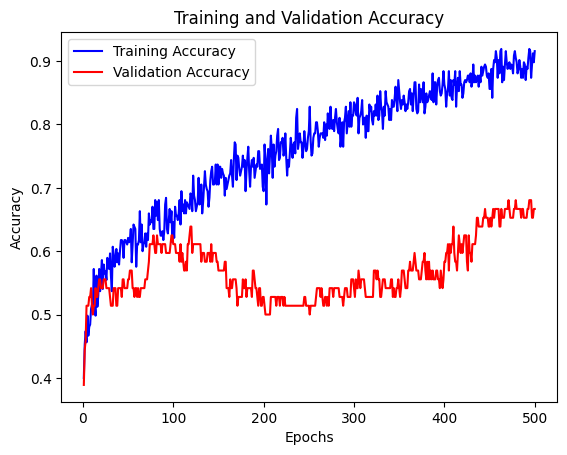

C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 6ms/step - loss: 1.6387 - accuracy: 0.5493
Loss : 1.63874089717865
Accuracy : 0.5492957830429077
3/3 [==============================] - 0s 4ms/step


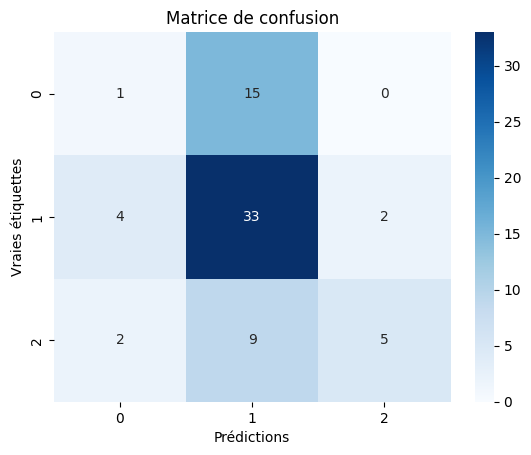

Report score combiné : 
               precision    recall  f1-score   support

           0       0.14      0.06      0.09        16
           1       0.58      0.85      0.69        39
           2       0.71      0.31      0.43        16

    accuracy                           0.55        71
   macro avg       0.48      0.41      0.40        71
weighted avg       0.51      0.55      0.50        71



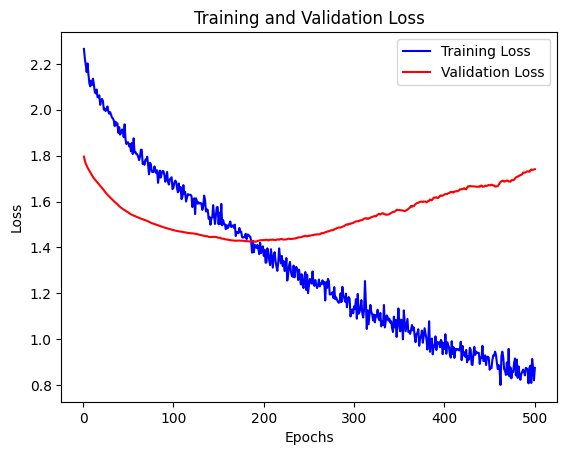

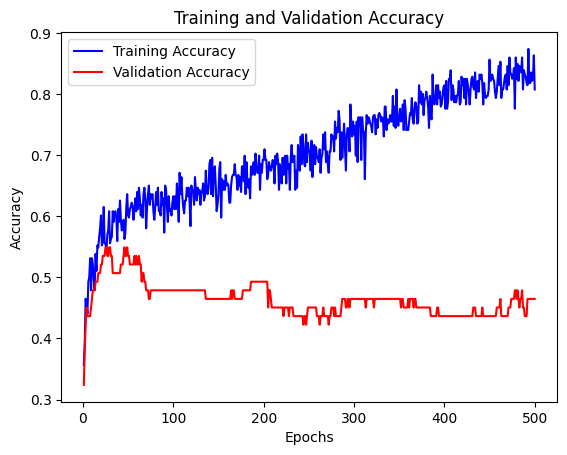

C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 5ms/step - loss: 0.9237 - accuracy: 0.7324
Loss : 0.9237297177314758
Accuracy : 0.7323943376541138
3/3 [==============================] - 0s 4ms/step


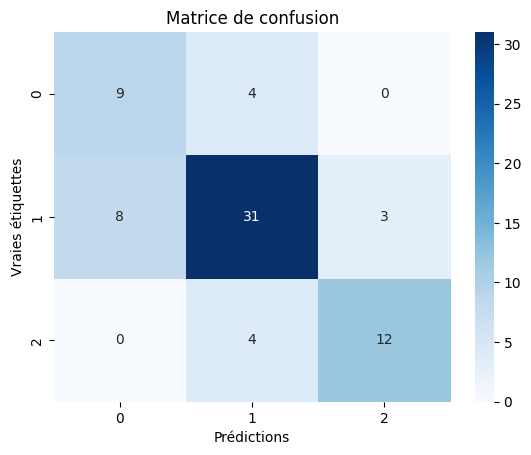

Report score combiné : 
               precision    recall  f1-score   support

           0       0.53      0.69      0.60        13
           1       0.79      0.74      0.77        42
           2       0.80      0.75      0.77        16

    accuracy                           0.73        71
   macro avg       0.71      0.73      0.71        71
weighted avg       0.75      0.73      0.74        71



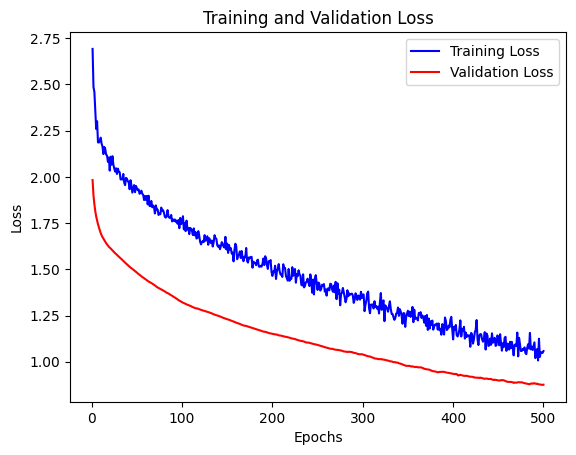

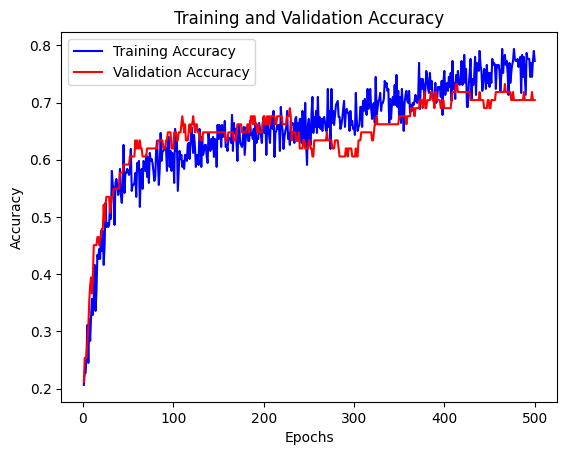

C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 6ms/step - loss: 1.2084 - accuracy: 0.6338
Loss : 1.2083779573440552
Accuracy : 0.6338028311729431
3/3 [==============================] - 0s 4ms/step


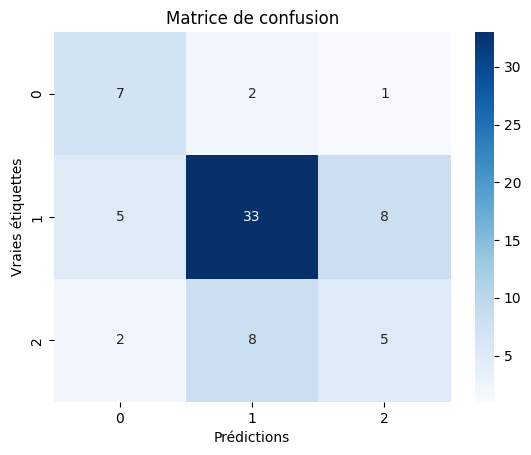

Report score combiné : 
               precision    recall  f1-score   support

           0       0.50      0.70      0.58        10
           1       0.77      0.72      0.74        46
           2       0.36      0.33      0.34        15

    accuracy                           0.63        71
   macro avg       0.54      0.58      0.56        71
weighted avg       0.64      0.63      0.64        71



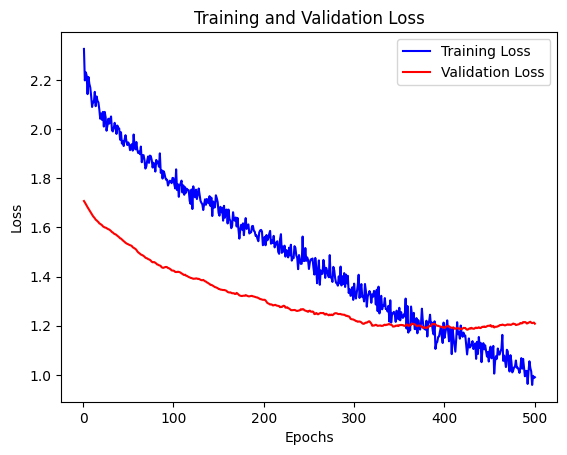

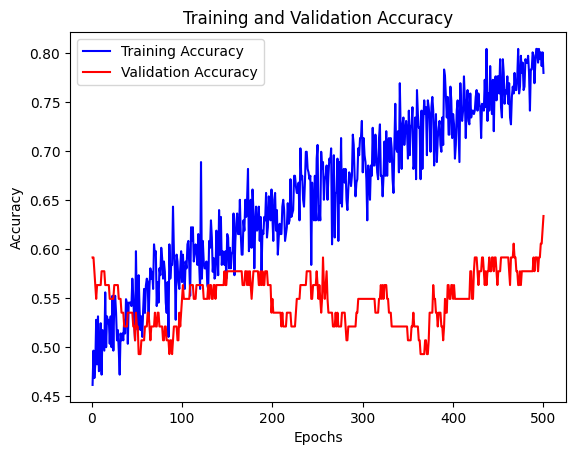

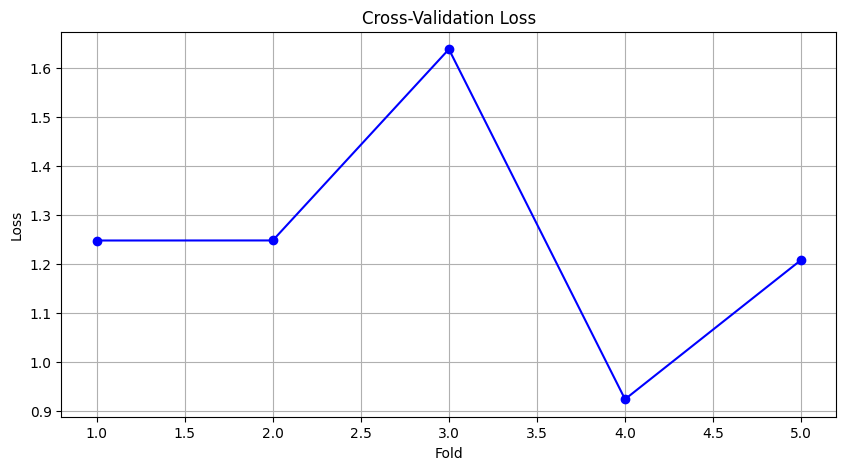

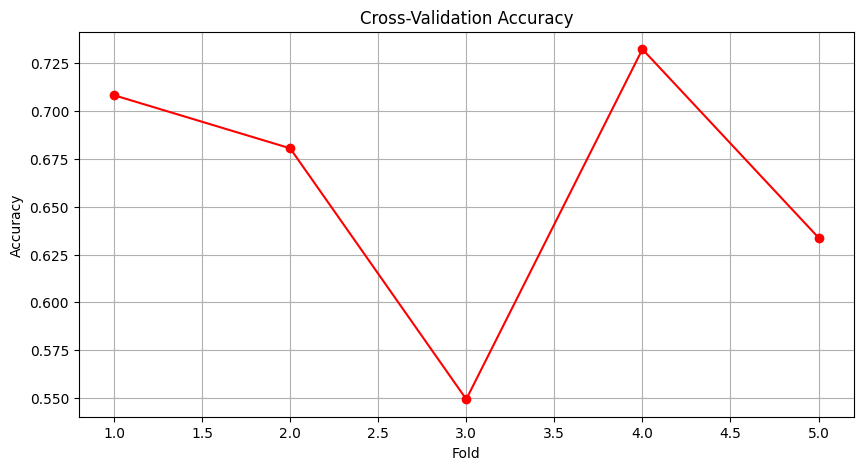


Average Loss: 1.2533813834190368
Average Accuracy: 0.6608763694763183

STD Loss: 0.22770805142748574
STD Accuracy: 0.06471082823995865


In [67]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, Adamax
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import os


#donnees = pd.read_excel('Results_v7.xlsx', sheet_name='T_set_4MS')
donnees = pd.read_excel('Results_v7_normalized_entropy.xlsx', sheet_name='T_set_4MS')
#donnees = pd.read_excel('Results_ML.xlsx')
y_score = donnees.iloc[:,2].values
y_score = y_score[~pd.isna(y_score)]
X_nom = donnees.iloc[:,0].values.reshape(-1, 1)
X_nom2 = donnees.iloc[:,1].values.reshape(-1, 1)
X_nom2 = X_nom2.astype(str)
for i in range(X_nom.shape[0]):
    X_nom[i,0] = X_nom[i,0]+"_"+X_nom2[i,0]

for i in range(len(y_score)):
    if y_score[i]==2:
        y_score[i]=1
    if y_score[i]==3:
        y_score[i]=2

#for a in range(4,48):
for a in range(4,52):
        if a!=11 and a!=26 and a!=36 and a!=42:
            measure = donnees.iloc[:, a].values
            measure = measure[~pd.isna(measure)]
            X_nom = np.column_stack((X_nom, measure))
X = X_nom[:,1:]
"""speed = np.mean(X[:,[3,16]], axis=1)
X[:,3]=speed
X = np.delete(X, 16, axis=1)"""
speed = np.mean(X[:,[3,17]], axis=1)
X[:,3]=speed
X = np.delete(X, 17, axis=1)

X = X.astype(np.float32)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
#kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Listes pour stocker les performances
losses = []
accuracies = []

# Validation croisée
for train_index, test_index in kf.split(X):
    if os.path.exists('best_model.h5'):
        os.remove('best_model.h5')
    checkpoint = ModelCheckpoint(
        'best_model.h5',               
        monitor='val_accuracy',       
        verbose=0,                    
        save_best_only=True,         
        mode='max'                   
    )
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_score[train_index], y_score[test_index]

    # Normalisation des données
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Conversion des classes de sortie en vecteurs "one-hot"
    y_train_one_hot = to_categorical(y_train, num_classes=3)
    y_test_one_hot = to_categorical(y_test, num_classes=3)

    # Définition du modèle du réseau de neurones
    model = Sequential([
        Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(8, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(3, activation='softmax')
    ])
    
    # Compilation du modèle
    model.compile(optimizer=Adamax(), loss='categorical_crossentropy', metrics=['accuracy'])


    # Entraînement du modèle
    history = model.fit(X_train_scaled, y_train_one_hot, epochs=500, batch_size=15, validation_data=(X_test_scaled, y_test_one_hot), callbacks=[checkpoint], verbose=0, class_weight={0: 2, 1:1, 2:2})

    # Evaluation du modèle
    model.load_weights('best_model.h5')
    model = load_model('best_model.h5')
    loss, accuracy = model.evaluate(X_test_scaled, y_test_one_hot)
    print("Loss :", loss)
    print("Accuracy :", accuracy)
    
    losses.append(loss)
    accuracies.append(accuracy)

    # Prédictions sur l'ensemble de test
    y_pred = np.argmax(model.predict(X_test_scaled), axis=1)

    # Matrice de confusion
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=["0", "1", "2"], yticklabels=["0", "1", "2"])
    plt.xlabel("Prédictions")
    plt.ylabel("Vraies étiquettes")
    plt.title("Matrice de confusion")
    plt.show()
    print("Report score combiné : \n",classification_report(y_test, y_pred))

    # Récupérer les valeurs de perte et d'exactitude
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(train_loss) + 1)

    # Tracer la perte
    plt.plot(epochs, train_loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Tracer l'exactitude
    plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Tracer les courbes de perte
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(losses) + 1), losses, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Loss')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Tracer les courbes d'exactitude
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', linestyle='-', color='r')
plt.title('Cross-Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Affichage des performances moyennes
print("\nAverage Loss:", np.mean(losses))
print("Average Accuracy:", np.mean(accuracies))
print("\nSTD Loss:", np.std(losses))
print("STD Accuracy:", np.std(accuracies))


# Diagnosis ternaire

C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 5ms/step - loss: 1.0414 - accuracy: 0.7083
Loss : 1.0413975715637207
Accuracy : 0.7083333134651184
3/3 [==============================] - 0s 5ms/step


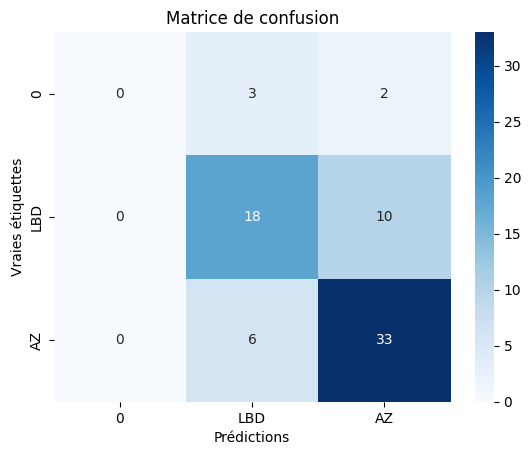

C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

Report score combiné : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.67      0.64      0.65        28
           2       0.73      0.85      0.79        39

    accuracy                           0.71        72
   macro avg       0.47      0.50      0.48        72
weighted avg       0.66      0.71      0.68        72



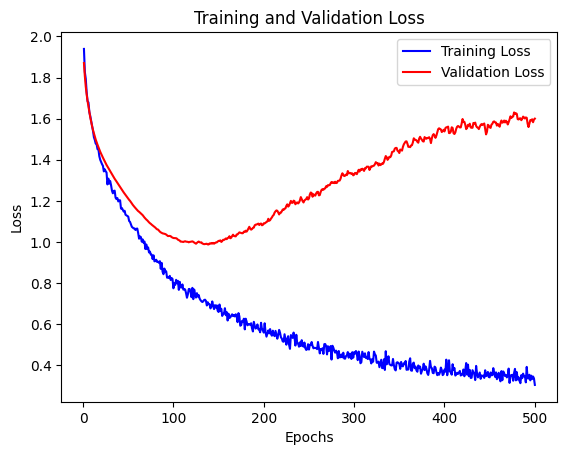

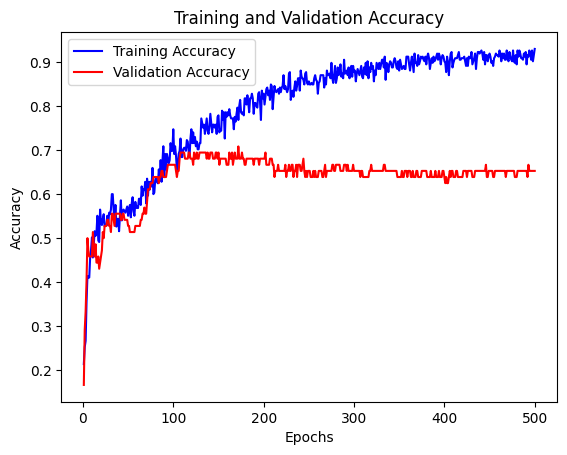

C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 6ms/step - loss: 0.9468 - accuracy: 0.6806
Loss : 0.9468082785606384
Accuracy : 0.6805555820465088
3/3 [==============================] - 0s 7ms/step


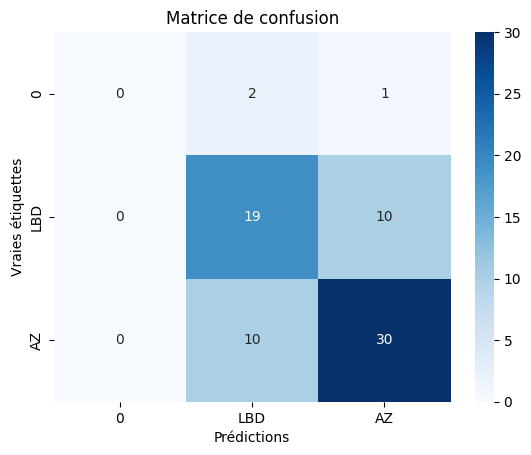

C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

Report score combiné : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.61      0.66      0.63        29
           2       0.73      0.75      0.74        40

    accuracy                           0.68        72
   macro avg       0.45      0.47      0.46        72
weighted avg       0.65      0.68      0.67        72



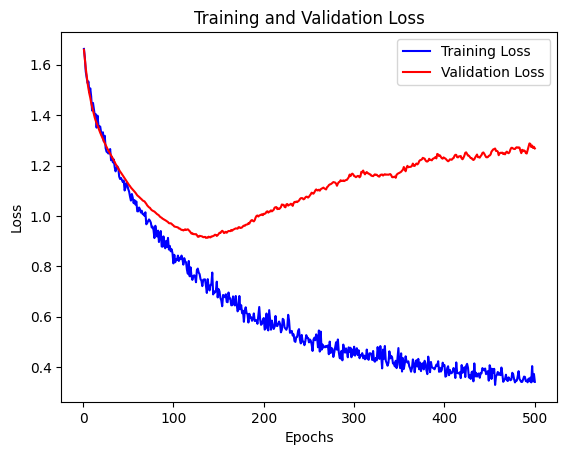

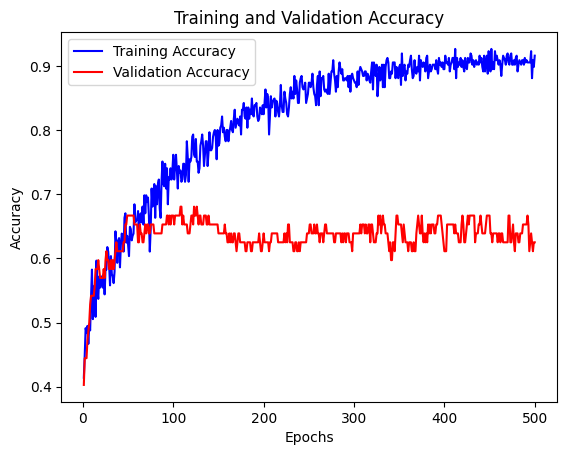

C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 6ms/step - loss: 1.1482 - accuracy: 0.7042
Loss : 1.1482130289077759
Accuracy : 0.7042253613471985
3/3 [==============================] - 0s 4ms/step


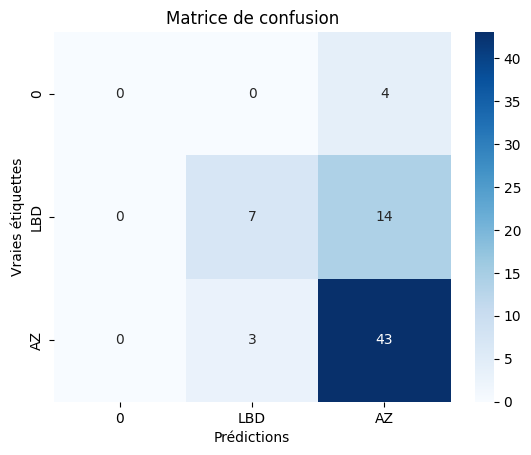

C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

Report score combiné : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.70      0.33      0.45        21
           2       0.70      0.93      0.80        46

    accuracy                           0.70        71
   macro avg       0.47      0.42      0.42        71
weighted avg       0.66      0.70      0.65        71



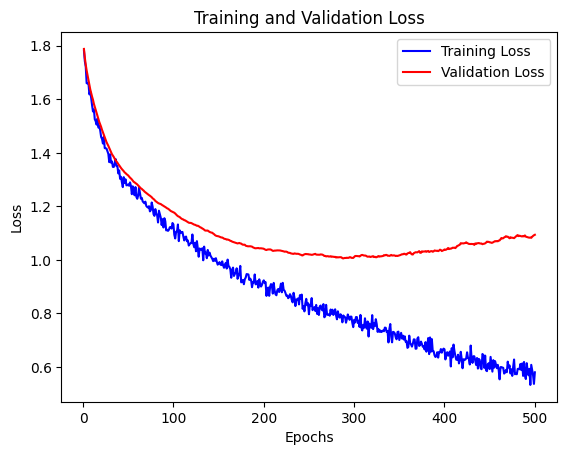

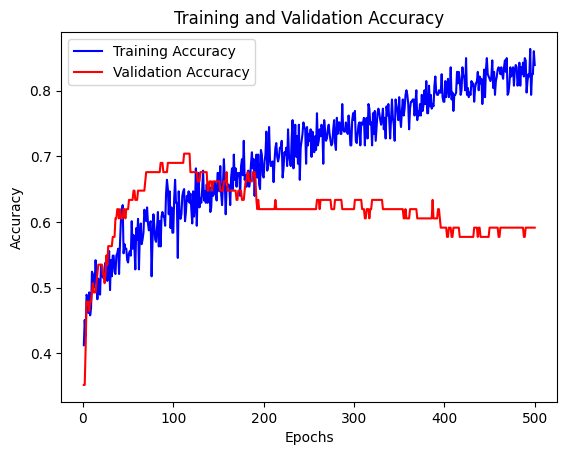

C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 6ms/step - loss: 1.1024 - accuracy: 0.7042
Loss : 1.1023634672164917
Accuracy : 0.7042253613471985
3/3 [==============================] - 0s 4ms/step


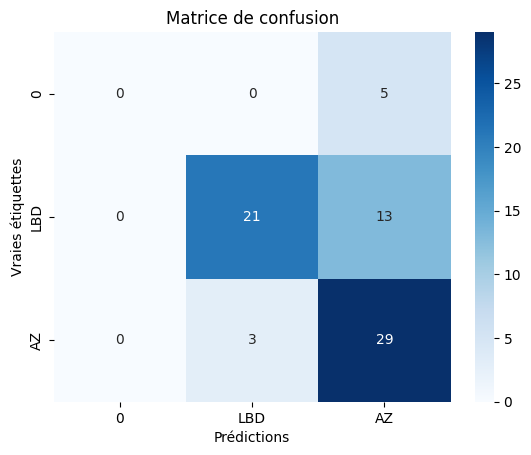

C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

Report score combiné : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.88      0.62      0.72        34
           2       0.62      0.91      0.73        32

    accuracy                           0.70        71
   macro avg       0.50      0.51      0.49        71
weighted avg       0.70      0.70      0.68        71



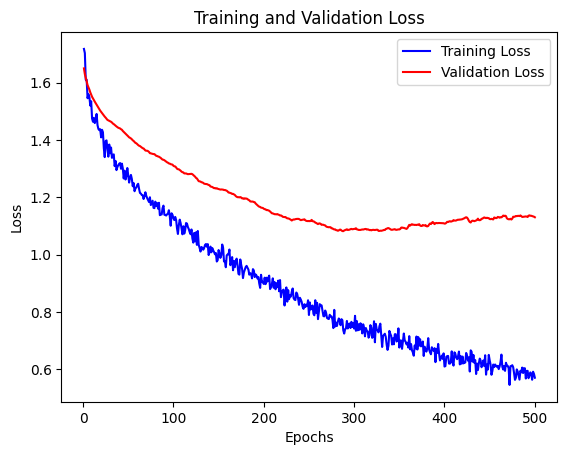

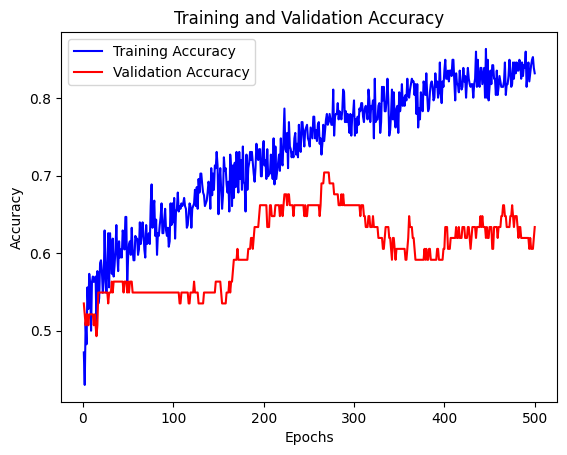

C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 6ms/step - loss: 1.2270 - accuracy: 0.6338
Loss : 1.2269986867904663
Accuracy : 0.6338028311729431
3/3 [==============================] - 0s 4ms/step


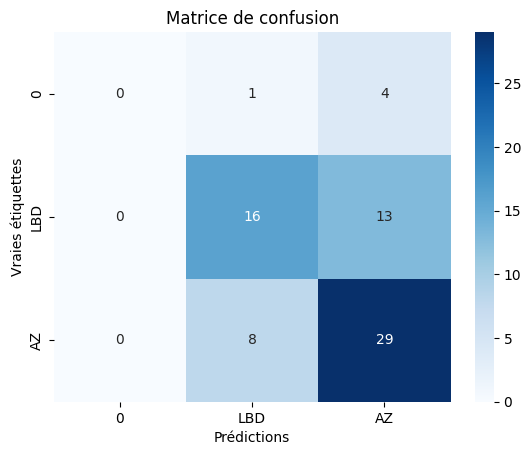

C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

Report score combiné : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.64      0.55      0.59        29
           2       0.63      0.78      0.70        37

    accuracy                           0.63        71
   macro avg       0.42      0.45      0.43        71
weighted avg       0.59      0.63      0.61        71



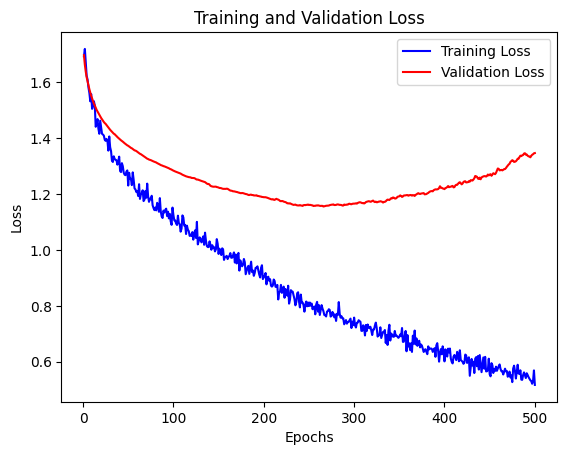

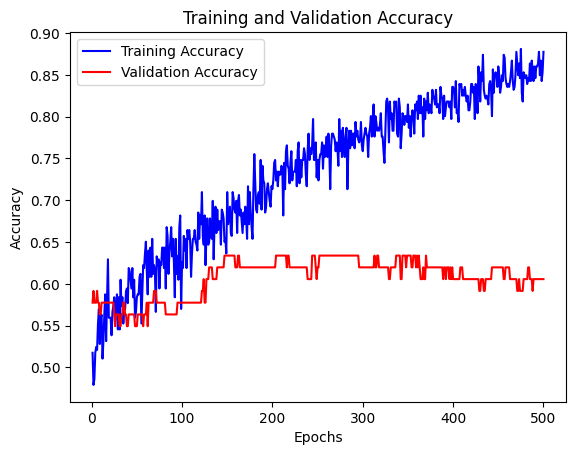

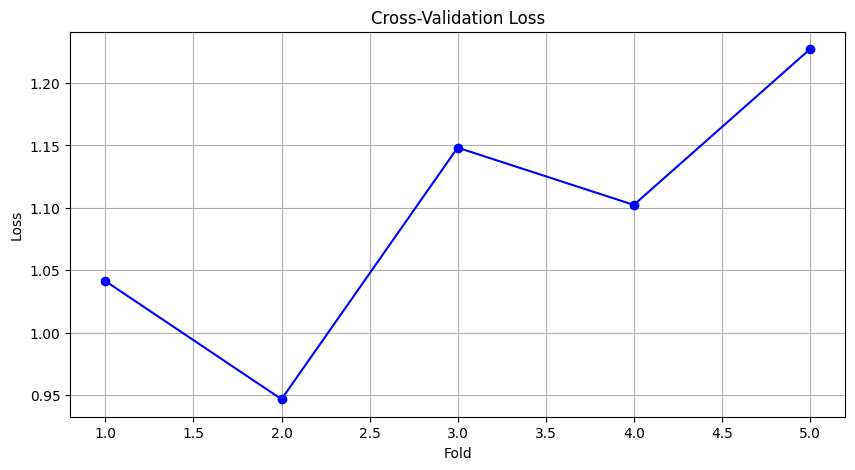

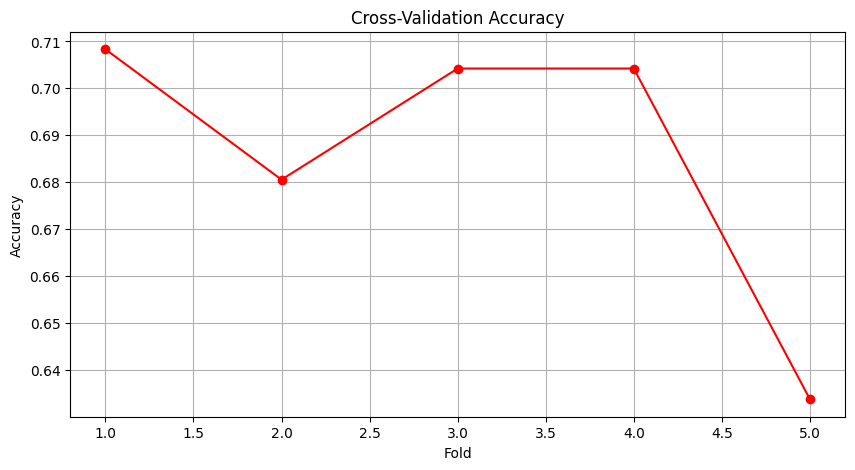


Average Loss: 1.0931562066078186
Average Accuracy: 0.6862284898757934

STD Loss: 0.09500158859351594
STD Accuracy: 0.027989389293441285


In [68]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, Adamax
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import os


#donnees = pd.read_excel('Results_v7.xlsx', sheet_name='T_set_4MS')
donnees = pd.read_excel('Results_v7_normalized_entropy.xlsx', sheet_name='T_set_4MS')
#donnees = pd.read_excel('Results_ML.xlsx')
y_score = donnees.iloc[:,3].values
y_sc = donnees.iloc[:,2].values
y_sc = y_sc[~pd.isna(y_score)]
y_score = y_score[~pd.isna(y_score)]
X_nom = donnees.iloc[:,0].values.reshape(-1, 1)
X_nom2 = donnees.iloc[:,1].values.reshape(-1, 1)
X_nom2 = X_nom2.astype(str)
for i in range(X_nom.shape[0]):
    X_nom[i,0] = X_nom[i,0]+"_"+X_nom2[i,0]

#for a in range(4,48):
for a in range(4,52):
        if a!=11 and a!=26 and a!=36 and a!=42:
            measure = donnees.iloc[:, a].values
            measure = measure[~pd.isna(measure)]
            X_nom = np.column_stack((X_nom, measure))
X = X_nom[:,1:]
"""speed = np.mean(X[:,[3,16]], axis=1)
X[:,3]=speed
X = np.delete(X, 16, axis=1)"""
speed = np.mean(X[:,[3,17]], axis=1)
X[:,3]=speed
X = np.delete(X, 17, axis=1)
y_binaire = []
for i in y_score:
    if i == 0:
         y_binaire.append(0)
    elif i == 1 or i == 3:
         y_binaire.append(1)
    elif i == 2 or i == 4:
         y_binaire.append(2)

X = X.astype(np.float32)
y_binaire = np.array(y_binaire)
y_binaire = y_binaire.astype(int)
y_score = y_binaire

X = X.astype(np.float32)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
#kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Listes pour stocker les performances
losses = []
accuracies = []

# Validation croisée
for train_index, test_index in kf.split(X):
    if os.path.exists('best_model.h5'):
        os.remove('best_model.h5')
    checkpoint = ModelCheckpoint(
        'best_model.h5',               
        monitor='val_accuracy',       
        verbose=0,                    
        save_best_only=True,         
        mode='max'                   
    )
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_score[train_index], y_score[test_index]
    nom_val = [X_nom[i,0] for i in test_index]
    y_sco = [y_sc[i] for i in test_index]

    # Normalisation des données
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    """# Réduction de la dimensionnalité avec PCA
    pca = PCA(n_components=9)  
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Conversion des classes de sortie en vecteurs "one-hot"
    y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=2)
    y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=2)

    # Définition du modèle du réseau de neurones
    model = Sequential([
        Dense(32, activation='relu', input_shape=(X_train_pca.shape[1],), kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(8, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])"""

    # Conversion des classes de sortie en vecteurs "one-hot"
    y_train_one_hot = to_categorical(y_train, num_classes=3)
    y_test_one_hot = to_categorical(y_test, num_classes=3)

    # Définition du modèle du réseau de neurones
    model = Sequential([
        Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(8, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(3, activation='softmax')
    ])
    
    # Compilation du modèle
    model.compile(optimizer=Adamax(), loss='categorical_crossentropy', metrics=['accuracy'])


    # Entraînement du modèle
    history = model.fit(X_train_scaled, y_train_one_hot, epochs=500, batch_size=15, validation_data=(X_test_scaled, y_test_one_hot), callbacks=[checkpoint], verbose=0, class_weight={0: 0.5, 1: 1, 2: 1})

    # Evaluation du modèle
    model.load_weights('best_model.h5')
    model = load_model('best_model.h5')
    loss, accuracy = model.evaluate(X_test_scaled, y_test_one_hot)
    print("Loss :", loss)
    print("Accuracy :", accuracy)
    
    losses.append(loss)
    accuracies.append(accuracy)

    # Prédictions sur l'ensemble de test
    y_pred = np.argmax(model.predict(X_test_scaled), axis=1)

    # Matrice de confusion
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=["0", "LBD", "AZ"], yticklabels=["0", "LBD", "AZ"])
    plt.xlabel("Prédictions")
    plt.ylabel("Vraies étiquettes")
    plt.title("Matrice de confusion")
    plt.show()
    print("Report score combiné : \n",classification_report(y_test, y_pred))

    # Récupérer les valeurs de perte et d'exactitude
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(train_loss) + 1)

    # Tracer la perte
    plt.plot(epochs, train_loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Tracer l'exactitude
    plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


# Tracer les courbes de perte
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(losses) + 1), losses, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Loss')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Tracer les courbes d'exactitude
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', linestyle='-', color='r')
plt.title('Cross-Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Affichage des performances moyennes
print("\nAverage Loss:", np.mean(losses))
print("Average Accuracy:", np.mean(accuracies))
print("\nSTD Loss:", np.std(losses))
print("STD Accuracy:", np.std(accuracies))

# Binary differenciation AZ VS LBD

In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, Adamax
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import os
from tensorflow.keras.layers import LeakyReLU


importances = []
importances_std = []
#donnees = pd.read_excel('Results_v7.xlsx', sheet_name='T_set_4MS')
donnees = pd.read_excel('Results_v7.xlsx', sheet_name='Feuil3')
#donnees = pd.read_excel('Results_ML.xlsx')
for ask in range(34):
    print(ask+1,"/34")
    y_score = donnees.iloc[:,3].values
    y_sc = donnees.iloc[:,2].values
    y_sc = y_sc[~pd.isna(y_score)]
    y_score = y_score[~pd.isna(y_score)]
    X_nom = donnees.iloc[:,0].values.reshape(-1, 1)
    X_nom[:,0] = X_nom[:,0].astype(str)
    X_nom2 = donnees.iloc[:,1].values.reshape(-1, 1)
    X_nom2 = X_nom2.astype(str)
    for i in range(X_nom.shape[0]):
        X_nom[i,0] = X_nom[i,0]+"_"+X_nom2[i,0]
    for a in range(4,38):
    #for a in range(4,52):
        if a != 4+ask:
            if (ask!= 3 or a!=17) and (ask!=13 or a!=7):
            #if a!=11 and a!=26 and a!=36 and a!=42:
            #if a!=4 and a!=10 and a!=13 and a!=15 and a!=16 and a!=17 and a!=23 and a!=26 and a!=28 and a!=29 and a!=31 and a!=33 and a!=36 and a!=38 and a!=40 and a!=42 and a!=44 and a!=46:
            #if a!=16 and a!=29 and a!=13 and a!=15 and a!=26 and a!=28 and a!=33 and a!=36 and a!=40 and a!=46:    
            #if a!=9:   
                measure = donnees.iloc[:, a].values
                measure = measure[~pd.isna(measure)]
                X_nom = np.column_stack((X_nom, measure))
                if a == 7:
                    first_length = X_nom.shape[1]-2
                if a==17:
                    second_length = X_nom.shape[1]-2
    X = X_nom[:,1:]
    if ask!=3 and ask!=13:
        speed = np.mean(X[:,[first_length,second_length]], axis=1)
        X[:,first_length]=speed
        X = np.delete(X, second_length, axis=1)
    """speed = np.mean(X[:,[3,13]], axis=1)
    X[:,3]=speed
    X = np.delete(X, 13, axis=1)"""
    y_binaire = []
    X_binaire = []
    for i in range(len(y_score)):
        if y_score[i] == 1 or y_score[i] == 3:
            y_binaire.append(0)
            X_binaire.append(X[i,:])
        elif y_score[i] == 2 or y_score[i] == 4:
            y_binaire.append(1)
            X_binaire.append(X[i,:])

    X_binaire = np.array(X_binaire)
    X_binaire = X_binaire.astype(np.float32)
    y_binaire = np.array(y_binaire)
    y_binaire = y_binaire.astype(int)
    y_score = y_binaire


    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    #kf = KFold(n_splits=3, shuffle=True, random_state=42)

    # Listes pour stocker les performances
    losses = []
    accuracies = []

    # Validation croisée
    for train_index, test_index in kf.split(X_binaire):
        if os.path.exists('best_model.h5'):
            os.remove('best_model.h5')
        checkpoint = ModelCheckpoint(
            'best_model.h5',               
            monitor='val_accuracy',       
            verbose=0,                    
            save_best_only=True,         
            mode='max'                   
        )
        X_train, X_test = X_binaire[train_index], X_binaire[test_index]
        y_train, y_test = y_score[train_index], y_score[test_index]
        nom_val = [X_nom[i,0] for i in test_index]
        y_sco = [y_sc[i] for i in test_index]

        # Normalisation des données
        scaler = StandardScaler()
        #scaler = MinMaxScaler(feature_range=(0,1))
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Conversion des classes de sortie en vecteurs "one-hot"
        y_train_one_hot = to_categorical(y_train, num_classes=2)
        y_test_one_hot = to_categorical(y_test, num_classes=2)

        # Définition du modèle du réseau de neurones
        model = Sequential([
            Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.01)),
            Dropout(0.2),
            Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
            Dropout(0.2),
            Dense(8, activation='relu', kernel_regularizer=l2(0.01)),
            Dropout(0.2),
            Dense(2, activation='softmax')
        ])
        """model = Sequential([
            Dense(6, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.01)),
            Dropout(0.2),
            Dense(4, activation='relu', kernel_regularizer=l2(0.01)),
            Dropout(0.2),
            Dense(2, activation='softmax')
        ])"""
        
        # Compilation du modèle
        model.compile(optimizer=Adamax(), loss='binary_crossentropy', metrics=['accuracy'])


        # Entraînement du modèle
        history = model.fit(X_train_scaled, y_train_one_hot, epochs=300, batch_size=8, validation_data=(X_test_scaled, y_test_one_hot), callbacks=[checkpoint], verbose=0, class_weight={0: 1, 1: 1})

        # Evaluation du modèle
        model.load_weights('best_model.h5')
        model = load_model('best_model.h5')
        loss, accuracy = model.evaluate(X_test_scaled, y_test_one_hot)
        print("Loss :", loss)
        print("Accuracy :", accuracy)
        
        losses.append(loss)
        accuracies.append(accuracy)

        # Prédictions sur l'ensemble de test
        y_pred = np.argmax(model.predict(X_test_scaled), axis=1)

        """# Matrice de confusion
        conf_matrix = confusion_matrix(y_test, y_pred)
        sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=["LBD", "AZ"], yticklabels=["LBD", "AZ"])
        plt.xlabel("Prédictions")
        plt.ylabel("Vraies étiquettes")
        plt.title("Matrice de confusion")
        plt.show()
        print("Report score combiné : \n",classification_report(y_test, y_pred))"""

        # Récupérer les valeurs de perte et d'exactitude
        train_loss = history.history['loss']
        val_loss = history.history['val_loss']
        train_accuracy = history.history['accuracy']
        val_accuracy = history.history['val_accuracy']
        epochs = range(1, len(train_loss) + 1)

        """# Tracer la perte
        plt.plot(epochs, train_loss, 'b', label='Training Loss')
        plt.plot(epochs, val_loss, 'r', label='Validation Loss')
        plt.title('Training and Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        # Tracer l'exactitude
        plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
        plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()"""


    """# Tracer les courbes de perte
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(losses) + 1), losses, marker='o', linestyle='-', color='b')
    plt.title('Cross-Validation Loss')
    plt.xlabel('Fold')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

    # Tracer les courbes d'exactitude
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', linestyle='-', color='r')
    plt.title('Cross-Validation Accuracy')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()

    # Affichage des performances moyennes
    print("\nAverage Loss:", np.mean(losses))
    print("Average Accuracy:", np.mean(accuracies))
    print("\nSTD Loss:", np.std(losses))
    print("STD Accuracy:", np.std(accuracies))"""

    importances.append(75.31-100*np.mean(accuracies))
    importances_std.append(np.std(accuracies))

for i in range(len(importances)):
    print("Feature ",i," manquant: accuracy = ",importances[i], " | std = ",importances_std[i])

1 /34


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 6ms/step - loss: 0.6743 - accuracy: 0.8125
Loss : 0.6742798089981079
Accuracy : 0.8125
2/2 [==============================] - 0s 5ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 8ms/step - loss: 0.6416 - accuracy: 0.8281
Loss : 0.6416139602661133
Accuracy : 0.828125
2/2 [==============================] - 0s 5ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 7ms/step - loss: 0.8308 - accuracy: 0.7500
Loss : 0.830805778503418
Accuracy : 0.75
2/2 [==============================] - 0s 5ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 5ms/step - loss: 0.8440 - accuracy: 0.7188
Loss : 0.8439577221870422
Accuracy : 0.71875
2/2 [==============================] - 0s 4ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 9ms/step - loss: 0.9280 - accuracy: 0.6562
Loss : 0.9280148148536682
Accuracy : 0.65625
2/2 [==============================] - 0s 4ms/step
2 /34


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 9ms/step - loss: 0.7071 - accuracy: 0.8125
Loss : 0.7071437835693359
Accuracy : 0.8125
2/2 [==============================] - 0s 4ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 4ms/step - loss: 0.7265 - accuracy: 0.7812
Loss : 0.7265298962593079
Accuracy : 0.78125
2/2 [==============================] - 0s 3ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 5ms/step - loss: 0.8501 - accuracy: 0.7344
Loss : 0.8501411080360413
Accuracy : 0.734375
2/2 [==============================] - 0s 5ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 5ms/step - loss: 0.8542 - accuracy: 0.7344
Loss : 0.8541805744171143
Accuracy : 0.734375
2/2 [==============================] - 0s 4ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 8ms/step - loss: 0.7785 - accuracy: 0.7188
Loss : 0.7785375714302063
Accuracy : 0.71875
2/2 [==============================] - 0s 4ms/step
3 /34


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 7ms/step - loss: 0.6317 - accuracy: 0.8125
Loss : 0.6317216157913208
Accuracy : 0.8125
2/2 [==============================] - 0s 4ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 17ms/step - loss: 0.6881 - accuracy: 0.7969
Loss : 0.6880742311477661
Accuracy : 0.796875
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 6ms/step - loss: 0.7025 - accuracy: 0.7188
Loss : 0.7024890184402466
Accuracy : 0.71875
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.7451 - accuracy: 0.7344
Loss : 0.74510657787323
Accuracy : 0.734375
2/2 [==============================] - 0s 16ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 6ms/step - loss: 0.8359 - accuracy: 0.7188
Loss : 0.835908830165863
Accuracy : 0.71875
2/2 [==============================] - 0s 3ms/step
4 /34


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 7ms/step - loss: 0.6545 - accuracy: 0.8125
Loss : 0.6544917225837708
Accuracy : 0.8125
2/2 [==============================] - 0s 3ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 5ms/step - loss: 0.7409 - accuracy: 0.7344
Loss : 0.7409009337425232
Accuracy : 0.734375
2/2 [==============================] - 0s 4ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 5ms/step - loss: 0.7790 - accuracy: 0.6875
Loss : 0.7790292501449585
Accuracy : 0.6875
2/2 [==============================] - 0s 2ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 6ms/step - loss: 0.7566 - accuracy: 0.7188
Loss : 0.756577730178833
Accuracy : 0.71875
2/2 [==============================] - 0s 3ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 10ms/step - loss: 0.8011 - accuracy: 0.7188
Loss : 0.8011438846588135
Accuracy : 0.71875
2/2 [==============================] - 0s 4ms/step
5 /34


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 15ms/step - loss: 0.6606 - accuracy: 0.8281
Loss : 0.6605784893035889
Accuracy : 0.828125
2/2 [==============================] - 0s 9ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 6ms/step - loss: 0.5964 - accuracy: 0.8281
Loss : 0.5963579416275024
Accuracy : 0.828125
2/2 [==============================] - 0s 4ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 1ms/step - loss: 0.9853 - accuracy: 0.7188
Loss : 0.9852879047393799
Accuracy : 0.71875
2/2 [==============================] - 0s 16ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.8545 - accuracy: 0.7500
Loss : 0.8544598817825317
Accuracy : 0.75
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.7256 - accuracy: 0.7656
Loss : 0.7256419062614441
Accuracy : 0.765625
2/2 [==============================] - 0s 0s/step
6 /34


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 7ms/step - loss: 0.7012 - accuracy: 0.8594
Loss : 0.7012321949005127
Accuracy : 0.859375
2/2 [==============================] - 0s 3ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 5ms/step - loss: 0.7048 - accuracy: 0.7812
Loss : 0.7048149108886719
Accuracy : 0.78125
2/2 [==============================] - 0s 16ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 5ms/step - loss: 0.7859 - accuracy: 0.7500
Loss : 0.7859295606613159
Accuracy : 0.75
2/2 [==============================] - 0s 2ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 6ms/step - loss: 0.7749 - accuracy: 0.7188
Loss : 0.7748526930809021
Accuracy : 0.71875
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.9761 - accuracy: 0.6875
Loss : 0.9760962724685669
Accuracy : 0.6875
2/2 [==============================] - 0s 4ms/step
7 /34


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.6465 - accuracy: 0.8125
Loss : 0.6464730501174927
Accuracy : 0.8125
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.7022 - accuracy: 0.7969
Loss : 0.7022185325622559
Accuracy : 0.796875
2/2 [==============================] - 0s 3ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 6ms/step - loss: 0.7318 - accuracy: 0.7500
Loss : 0.7317965030670166
Accuracy : 0.75
2/2 [==============================] - 0s 4ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 5ms/step - loss: 0.7703 - accuracy: 0.7031
Loss : 0.7703143358230591
Accuracy : 0.703125
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 15ms/step - loss: 0.7327 - accuracy: 0.6719
Loss : 0.7326952815055847
Accuracy : 0.671875
2/2 [==============================] - 0s 4ms/step
8 /34


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 3ms/step - loss: 0.5742 - accuracy: 0.8281
Loss : 0.5741565227508545
Accuracy : 0.828125
2/2 [==============================] - 0s 16ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.7598 - accuracy: 0.6875
Loss : 0.7597557306289673
Accuracy : 0.6875
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 6ms/step - loss: 0.7639 - accuracy: 0.7188
Loss : 0.763883113861084
Accuracy : 0.71875
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 8ms/step - loss: 0.7231 - accuracy: 0.7188
Loss : 0.7230710983276367
Accuracy : 0.71875
2/2 [==============================] - 0s 1ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.8185 - accuracy: 0.7031
Loss : 0.8184679746627808
Accuracy : 0.703125
2/2 [==============================] - 0s 0s/step
9 /34


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 6ms/step - loss: 0.6844 - accuracy: 0.8125
Loss : 0.6844154596328735
Accuracy : 0.8125
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 7ms/step - loss: 0.6503 - accuracy: 0.7812
Loss : 0.6502602100372314
Accuracy : 0.78125
2/2 [==============================] - 0s 4ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 5ms/step - loss: 0.7320 - accuracy: 0.7344
Loss : 0.73195481300354
Accuracy : 0.734375
2/2 [==============================] - 0s 16ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 720us/step - loss: 0.8964 - accuracy: 0.7031
Loss : 0.8964442610740662
Accuracy : 0.703125
2/2 [==============================] - 0s 14ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 5ms/step - loss: 0.7607 - accuracy: 0.7031
Loss : 0.7607119679450989
Accuracy : 0.703125
2/2 [==============================] - 0s 4ms/step
10 /34


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 7ms/step - loss: 0.6668 - accuracy: 0.8281
Loss : 0.6668285131454468
Accuracy : 0.828125
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 7ms/step - loss: 0.6259 - accuracy: 0.7969
Loss : 0.6259242296218872
Accuracy : 0.796875
2/2 [==============================] - 0s 3ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 1s 7ms/step - loss: 0.7710 - accuracy: 0.7812
Loss : 0.7709983587265015
Accuracy : 0.78125
2/2 [==============================] - 0s 3ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 16ms/step - loss: 0.7667 - accuracy: 0.7500
Loss : 0.7666566371917725
Accuracy : 0.75
2/2 [==============================] - 0s 4ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.6593 - accuracy: 0.7500
Loss : 0.6593078374862671
Accuracy : 0.75
2/2 [==============================] - 0s 3ms/step
11 /34


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 7ms/step - loss: 0.6496 - accuracy: 0.8125
Loss : 0.6495873332023621
Accuracy : 0.8125
2/2 [==============================] - 0s 3ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 15ms/step - loss: 0.6817 - accuracy: 0.7969
Loss : 0.6816729307174683
Accuracy : 0.796875
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 16ms/step - loss: 0.8834 - accuracy: 0.7500
Loss : 0.8834046125411987
Accuracy : 0.75
2/2 [==============================] - 0s 3ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 17ms/step - loss: 1.1060 - accuracy: 0.7812
Loss : 1.1059626340866089
Accuracy : 0.78125
2/2 [==============================] - 0s 5ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 1.0667 - accuracy: 0.7344
Loss : 1.0666615962982178
Accuracy : 0.734375
2/2 [==============================] - 0s 6ms/step
12 /34


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 3ms/step - loss: 0.6407 - accuracy: 0.7969
Loss : 0.640690803527832
Accuracy : 0.796875
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 6ms/step - loss: 0.6013 - accuracy: 0.7812
Loss : 0.6013048887252808
Accuracy : 0.78125
2/2 [==============================] - 0s 16ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 6ms/step - loss: 0.7550 - accuracy: 0.7031
Loss : 0.7549989819526672
Accuracy : 0.703125
2/2 [==============================] - 0s 4ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 6ms/step - loss: 0.7470 - accuracy: 0.7188
Loss : 0.746975839138031
Accuracy : 0.71875
2/2 [==============================] - 0s 16ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 2ms/step - loss: 0.7911 - accuracy: 0.7344
Loss : 0.7911268472671509
Accuracy : 0.734375
2/2 [==============================] - 0s 1ms/step
13 /34


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 7ms/step - loss: 0.6488 - accuracy: 0.8281
Loss : 0.6487960815429688
Accuracy : 0.828125
2/2 [==============================] - 0s 4ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 7ms/step - loss: 0.8592 - accuracy: 0.6875
Loss : 0.8591850996017456
Accuracy : 0.6875
2/2 [==============================] - 0s 5ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 9ms/step - loss: 0.8856 - accuracy: 0.7188
Loss : 0.8855888843536377
Accuracy : 0.71875
2/2 [==============================] - 0s 2ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.7151 - accuracy: 0.7188
Loss : 0.7151104211807251
Accuracy : 0.71875
2/2 [==============================] - 0s 18ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 5ms/step - loss: 0.7592 - accuracy: 0.7031
Loss : 0.7592357993125916
Accuracy : 0.703125
2/2 [==============================] - 0s 3ms/step
14 /34


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.6760 - accuracy: 0.7812
Loss : 0.6759605407714844
Accuracy : 0.78125
2/2 [==============================] - 0s 1ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 9ms/step - loss: 0.8302 - accuracy: 0.7031
Loss : 0.830232560634613
Accuracy : 0.703125
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 11ms/step - loss: 0.7458 - accuracy: 0.7656
Loss : 0.7457854747772217
Accuracy : 0.765625
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 6ms/step - loss: 0.8015 - accuracy: 0.7188
Loss : 0.8015451431274414
Accuracy : 0.71875
2/2 [==============================] - 0s 7ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.8425 - accuracy: 0.7188
Loss : 0.8424970507621765
Accuracy : 0.71875
2/2 [==============================] - 0s 3ms/step
15 /34


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 5ms/step - loss: 0.6447 - accuracy: 0.7969
Loss : 0.6446828842163086
Accuracy : 0.796875
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.7089 - accuracy: 0.7500
Loss : 0.7088925242424011
Accuracy : 0.75
2/2 [==============================] - 0s 3ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.7932 - accuracy: 0.7656
Loss : 0.7932122945785522
Accuracy : 0.765625
2/2 [==============================] - 0s 2ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 7ms/step - loss: 0.9013 - accuracy: 0.7500
Loss : 0.9013081789016724
Accuracy : 0.75
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 5ms/step - loss: 0.8069 - accuracy: 0.7031
Loss : 0.8068705201148987
Accuracy : 0.703125
2/2 [==============================] - 0s 4ms/step
16 /34


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 8ms/step - loss: 0.6589 - accuracy: 0.7812
Loss : 0.6589293479919434
Accuracy : 0.78125
2/2 [==============================] - 0s 3ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.6924 - accuracy: 0.7656
Loss : 0.692419171333313
Accuracy : 0.765625
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.7339 - accuracy: 0.7344
Loss : 0.7338621020317078
Accuracy : 0.734375
2/2 [==============================] - 0s 4ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 8ms/step - loss: 0.7994 - accuracy: 0.7344
Loss : 0.7994028329849243
Accuracy : 0.734375
2/2 [==============================] - 0s 2ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 7ms/step - loss: 0.9110 - accuracy: 0.7812
Loss : 0.911013126373291
Accuracy : 0.78125
2/2 [==============================] - 0s 4ms/step
17 /34


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.6195 - accuracy: 0.8125
Loss : 0.619495153427124
Accuracy : 0.8125
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.6915 - accuracy: 0.7812
Loss : 0.6915385127067566
Accuracy : 0.78125
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.8342 - accuracy: 0.7656
Loss : 0.8341935873031616
Accuracy : 0.765625
2/2 [==============================] - 0s 4ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.7134 - accuracy: 0.7344
Loss : 0.7133890390396118
Accuracy : 0.734375
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 1.1740 - accuracy: 0.6875
Loss : 1.1740424633026123
Accuracy : 0.6875
2/2 [==============================] - 0s 0s/step
18 /34


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.6927 - accuracy: 0.8125
Loss : 0.6926906704902649
Accuracy : 0.8125
2/2 [==============================] - 0s 5ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 19ms/step - loss: 0.7282 - accuracy: 0.7656
Loss : 0.7282112240791321
Accuracy : 0.765625
2/2 [==============================] - 0s 3ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 12ms/step - loss: 0.8248 - accuracy: 0.7344
Loss : 0.8248087763786316
Accuracy : 0.734375
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 16ms/step - loss: 0.8442 - accuracy: 0.7031
Loss : 0.8441576361656189
Accuracy : 0.703125
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 16ms/step - loss: 0.8450 - accuracy: 0.7344
Loss : 0.8450223207473755
Accuracy : 0.734375
2/2 [==============================] - 0s 17ms/step
19 /34


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 5ms/step - loss: 0.7054 - accuracy: 0.8125
Loss : 0.7054203152656555
Accuracy : 0.8125
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 17ms/step - loss: 0.7447 - accuracy: 0.7500
Loss : 0.7447127103805542
Accuracy : 0.75
2/2 [==============================] - 0s 4ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 9ms/step - loss: 0.7762 - accuracy: 0.7500
Loss : 0.7762254476547241
Accuracy : 0.75
2/2 [==============================] - 0s 4ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 6ms/step - loss: 0.8143 - accuracy: 0.7344
Loss : 0.8143414258956909
Accuracy : 0.734375
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 12ms/step - loss: 0.7153 - accuracy: 0.6875
Loss : 0.7153317928314209
Accuracy : 0.6875
2/2 [==============================] - 0s 0s/step
20 /34


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 16ms/step - loss: 0.5959 - accuracy: 0.8281
Loss : 0.5958572626113892
Accuracy : 0.828125
2/2 [==============================] - 0s 3ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.8357 - accuracy: 0.7344
Loss : 0.8356518745422363
Accuracy : 0.734375
2/2 [==============================] - 0s 15ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 5ms/step - loss: 0.7434 - accuracy: 0.7812
Loss : 0.7433828711509705
Accuracy : 0.78125
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.7024 - accuracy: 0.7500
Loss : 0.702379047870636
Accuracy : 0.75
2/2 [==============================] - 0s 17ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 5ms/step - loss: 0.8198 - accuracy: 0.7031
Loss : 0.8197553157806396
Accuracy : 0.703125
2/2 [==============================] - 0s 3ms/step
21 /34


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 7ms/step - loss: 0.7458 - accuracy: 0.7969
Loss : 0.7458477020263672
Accuracy : 0.796875
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 5ms/step - loss: 0.8550 - accuracy: 0.7031
Loss : 0.8550036549568176
Accuracy : 0.703125
2/2 [==============================] - 0s 4ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.7500 - accuracy: 0.7344
Loss : 0.7499591112136841
Accuracy : 0.734375
2/2 [==============================] - 0s 4ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 667us/step - loss: 0.7332 - accuracy: 0.7188
Loss : 0.7331875562667847
Accuracy : 0.71875
2/2 [==============================] - 0s 5ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.8185 - accuracy: 0.7188
Loss : 0.8184738159179688
Accuracy : 0.71875
2/2 [==============================] - 0s 2ms/step
22 /34


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.6624 - accuracy: 0.7969
Loss : 0.6623973846435547
Accuracy : 0.796875
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.6608 - accuracy: 0.7656
Loss : 0.660828709602356
Accuracy : 0.765625
2/2 [==============================] - 0s 3ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 6ms/step - loss: 0.8307 - accuracy: 0.7500
Loss : 0.8306775093078613
Accuracy : 0.75
2/2 [==============================] - 0s 3ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 5ms/step - loss: 0.7607 - accuracy: 0.7656
Loss : 0.7607322931289673
Accuracy : 0.765625
2/2 [==============================] - 0s 3ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 9ms/step - loss: 1.0583 - accuracy: 0.6875
Loss : 1.0582542419433594
Accuracy : 0.6875
2/2 [==============================] - 0s 0s/step
23 /34


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.6558 - accuracy: 0.8281
Loss : 0.6557953357696533
Accuracy : 0.828125
2/2 [==============================] - 0s 4ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.6870 - accuracy: 0.7969
Loss : 0.6869898438453674
Accuracy : 0.796875
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.6867 - accuracy: 0.7500
Loss : 0.6866847276687622
Accuracy : 0.75
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 15ms/step - loss: 0.7637 - accuracy: 0.7500
Loss : 0.7637379169464111
Accuracy : 0.75
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 17ms/step - loss: 0.8692 - accuracy: 0.7500
Loss : 0.8691946864128113
Accuracy : 0.75
2/2 [==============================] - 0s 3ms/step
24 /34


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 17ms/step - loss: 0.6743 - accuracy: 0.8125
Loss : 0.6742671728134155
Accuracy : 0.8125
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.6487 - accuracy: 0.7656
Loss : 0.6486557722091675
Accuracy : 0.765625
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.7490 - accuracy: 0.7344
Loss : 0.7489809393882751
Accuracy : 0.734375
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 8ms/step - loss: 0.7122 - accuracy: 0.7188
Loss : 0.712157130241394
Accuracy : 0.71875
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.7634 - accuracy: 0.7344
Loss : 0.7633988857269287
Accuracy : 0.734375
2/2 [==============================] - 0s 0s/step
25 /34


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.7344
Loss : 0.6980025172233582
Accuracy : 0.734375
2/2 [==============================] - 0s 16ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 5ms/step - loss: 0.8239 - accuracy: 0.7031
Loss : 0.8238894939422607
Accuracy : 0.703125
2/2 [==============================] - 0s 4ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 17ms/step - loss: 0.9365 - accuracy: 0.6875
Loss : 0.9364746809005737
Accuracy : 0.6875
2/2 [==============================] - 0s 2ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 16ms/step - loss: 0.8609 - accuracy: 0.6875
Loss : 0.8608874082565308
Accuracy : 0.6875
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 5ms/step - loss: 1.0344 - accuracy: 0.7344
Loss : 1.0343788862228394
Accuracy : 0.734375
2/2 [==============================] - 0s 0s/step
26 /34


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 16ms/step - loss: 0.6180 - accuracy: 0.8281
Loss : 0.6179987192153931
Accuracy : 0.828125
2/2 [==============================] - 0s 3ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.7299 - accuracy: 0.7344
Loss : 0.7298794984817505
Accuracy : 0.734375
2/2 [==============================] - 0s 3ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.7677 - accuracy: 0.7188
Loss : 0.767730176448822
Accuracy : 0.71875
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 16ms/step - loss: 0.7992 - accuracy: 0.7188
Loss : 0.7991816997528076
Accuracy : 0.71875
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 18ms/step - loss: 1.0416 - accuracy: 0.7188
Loss : 1.0416189432144165
Accuracy : 0.71875
2/2 [==============================] - 0s 0s/step
27 /34


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 15ms/step - loss: 0.6221 - accuracy: 0.7812
Loss : 0.6221038103103638
Accuracy : 0.78125
2/2 [==============================] - 0s 2ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 2ms/step - loss: 0.8583 - accuracy: 0.7500
Loss : 0.8583233952522278
Accuracy : 0.75
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 9ms/step - loss: 0.7448 - accuracy: 0.7188
Loss : 0.744807779788971
Accuracy : 0.71875
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 6ms/step - loss: 0.7735 - accuracy: 0.7188
Loss : 0.7734953761100769
Accuracy : 0.71875
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.8189 - accuracy: 0.7031
Loss : 0.8188565969467163
Accuracy : 0.703125
2/2 [==============================] - 0s 13ms/step
28 /34


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.6345 - accuracy: 0.7969
Loss : 0.6344923973083496
Accuracy : 0.796875
2/2 [==============================] - 0s 3ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.6795 - accuracy: 0.7656
Loss : 0.6795071363449097
Accuracy : 0.765625
2/2 [==============================] - 0s 17ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.8514 - accuracy: 0.7500
Loss : 0.8514072895050049
Accuracy : 0.75
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.7972 - accuracy: 0.7188
Loss : 0.7972124814987183
Accuracy : 0.71875
2/2 [==============================] - 0s 1ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.8306 - accuracy: 0.7188
Loss : 0.8305927515029907
Accuracy : 0.71875
2/2 [==============================] - 0s 5ms/step
29 /34


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 16ms/step - loss: 0.6598 - accuracy: 0.8125
Loss : 0.6597917079925537
Accuracy : 0.8125
2/2 [==============================] - 0s 3ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 16ms/step - loss: 0.7044 - accuracy: 0.7656
Loss : 0.7043542265892029
Accuracy : 0.765625
2/2 [==============================] - 0s 3ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 0s/step - loss: 0.8441 - accuracy: 0.7500
Loss : 0.8441243767738342
Accuracy : 0.75
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 5ms/step - loss: 0.8011 - accuracy: 0.7188
Loss : 0.8011254072189331
Accuracy : 0.71875
2/2 [==============================] - 0s 0s/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 6ms/step - loss: 0.6860 - accuracy: 0.7031
Loss : 0.6859697699546814
Accuracy : 0.703125
2/2 [==============================] - 0s 3ms/step
30 /34


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.7812
Loss : 0.6935678124427795
Accuracy : 0.78125
2/2 [==============================] - 0s 4ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 5ms/step - loss: 0.7898 - accuracy: 0.7188
Loss : 0.7898036241531372
Accuracy : 0.71875
2/2 [==============================] - 0s 4ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 4ms/step - loss: 1.1735 - accuracy: 0.7031
Loss : 1.1734530925750732
Accuracy : 0.703125
2/2 [==============================] - 0s 3ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 9ms/step - loss: 0.7985 - accuracy: 0.7031
Loss : 0.7985183000564575
Accuracy : 0.703125
2/2 [==============================] - 0s 5ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 8ms/step - loss: 0.7138 - accuracy: 0.7031
Loss : 0.7137876749038696
Accuracy : 0.703125
2/2 [==============================] - 0s 4ms/step
31 /34


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 1s 5ms/step - loss: 0.6247 - accuracy: 0.7969
Loss : 0.6247028112411499
Accuracy : 0.796875
2/2 [==============================] - 0s 3ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 4ms/step - loss: 0.6891 - accuracy: 0.7812
Loss : 0.6890708208084106
Accuracy : 0.78125
2/2 [==============================] - 0s 3ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 6ms/step - loss: 0.6969 - accuracy: 0.7500
Loss : 0.6969062089920044
Accuracy : 0.75
2/2 [==============================] - 0s 3ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 5ms/step - loss: 0.7322 - accuracy: 0.7344
Loss : 0.7322131395339966
Accuracy : 0.734375
2/2 [==============================] - 0s 4ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 6ms/step - loss: 0.7587 - accuracy: 0.7344
Loss : 0.7587203979492188
Accuracy : 0.734375
2/2 [==============================] - 0s 4ms/step
32 /34


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 7ms/step - loss: 0.6181 - accuracy: 0.7969
Loss : 0.6181296110153198
Accuracy : 0.796875
2/2 [==============================] - 0s 3ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 11ms/step - loss: 0.6220 - accuracy: 0.7969
Loss : 0.621990978717804
Accuracy : 0.796875
2/2 [==============================] - 0s 9ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 8ms/step - loss: 0.7498 - accuracy: 0.7656
Loss : 0.749769389629364
Accuracy : 0.765625
2/2 [==============================] - 0s 13ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 13ms/step - loss: 0.8049 - accuracy: 0.7188
Loss : 0.8048627972602844
Accuracy : 0.71875
2/2 [==============================] - 0s 4ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 14ms/step - loss: 0.6991 - accuracy: 0.7656
Loss : 0.6990865468978882
Accuracy : 0.765625
2/2 [==============================] - 0s 5ms/step
33 /34


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 5ms/step - loss: 0.6107 - accuracy: 0.8125
Loss : 0.6106613874435425
Accuracy : 0.8125
2/2 [==============================] - 0s 3ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 1s 8ms/step - loss: 0.7761 - accuracy: 0.7500
Loss : 0.7760993242263794
Accuracy : 0.75
2/2 [==============================] - 0s 9ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 9ms/step - loss: 0.6992 - accuracy: 0.7500
Loss : 0.6992175579071045
Accuracy : 0.75
2/2 [==============================] - 0s 11ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 5ms/step - loss: 0.7057 - accuracy: 0.7344
Loss : 0.705734133720398
Accuracy : 0.734375
2/2 [==============================] - 0s 2ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 8ms/step - loss: 0.8197 - accuracy: 0.7188
Loss : 0.8197243213653564
Accuracy : 0.71875
2/2 [==============================] - 0s 3ms/step
34 /34


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 4ms/step - loss: 0.6411 - accuracy: 0.8281
Loss : 0.6411144733428955
Accuracy : 0.828125
2/2 [==============================] - 0s 3ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 5ms/step - loss: 0.7588 - accuracy: 0.7500
Loss : 0.7588249444961548
Accuracy : 0.75
2/2 [==============================] - 0s 4ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 4ms/step - loss: 0.8181 - accuracy: 0.7500
Loss : 0.8181389570236206
Accuracy : 0.75
2/2 [==============================] - 0s 3ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 4ms/step - loss: 0.7243 - accuracy: 0.7656
Loss : 0.7243382930755615
Accuracy : 0.765625
2/2 [==============================] - 0s 2ms/step


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 7ms/step - loss: 0.8488 - accuracy: 0.7188
Loss : 0.8487668037414551
Accuracy : 0.71875
2/2 [==============================] - 0s 3ms/step
Feature  0  manquant: accuracy =  -0.0024999999999977263  | std =  0.06281172263200556
Feature  1  manquant: accuracy =  -0.3149999999999977  | std =  0.0350780380010057
Feature  2  manquant: accuracy =  -0.3149999999999977  | std =  0.04026280852101602
Feature  3  manquant: accuracy =  1.8725000000000023  | std =  0.04192627457812106
Feature  4  manquant: accuracy =  -2.5024999999999977  | std =  0.04352621336620037
Feature  5  manquant: accuracy =  -0.6274999999999977  | std =  0.05896238207535377
Feature  6  manquant: accuracy =  0.6225000000000023  | std =  0.05358258812338203
Feature  7  manquant: accuracy =  2.1850000000000023  | std =  0.049804304532841334
Feature  8  manquant: accuracy =  0.6225000000000023  | std =  0.04352621336620038
Feature  9  manquant: accuracy =  -2.8149999999999977  | std =  

# Binary Diagnosis (H/Patients)

C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 5ms/step - loss: 1.1920 - accuracy: 0.9306
Loss : 1.1919729709625244
Accuracy : 0.9305555820465088
3/3 [==============================] - 0s 4ms/step


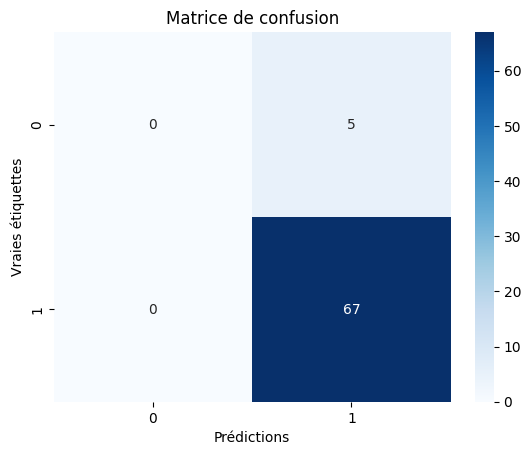

C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

Report score combiné : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.93      1.00      0.96        67

    accuracy                           0.93        72
   macro avg       0.47      0.50      0.48        72
weighted avg       0.87      0.93      0.90        72



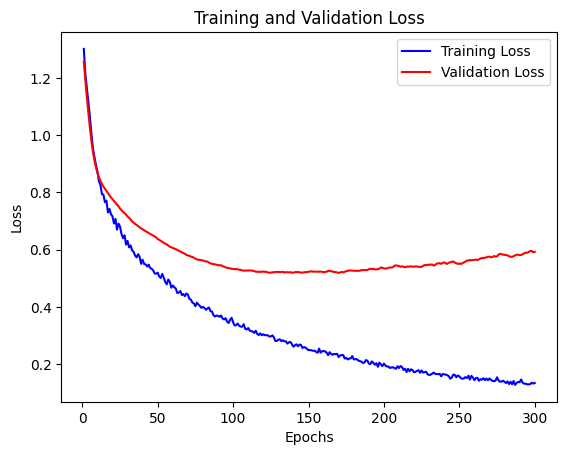

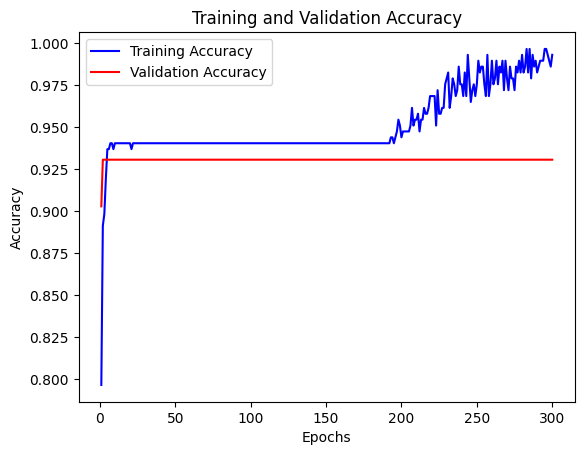

C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 6ms/step - loss: 1.0998 - accuracy: 0.9583
Loss : 1.0997854471206665
Accuracy : 0.9583333134651184
3/3 [==============================] - 0s 3ms/step


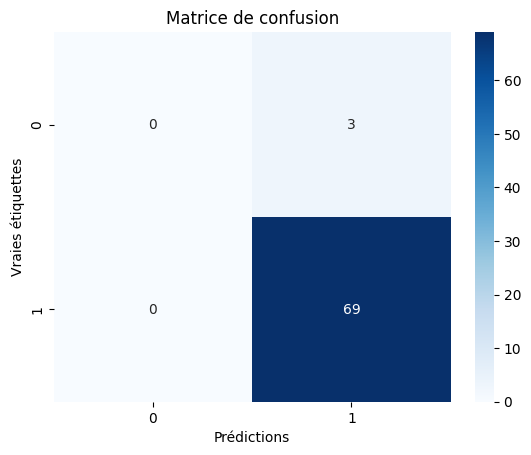

C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

Report score combiné : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.96      1.00      0.98        69

    accuracy                           0.96        72
   macro avg       0.48      0.50      0.49        72
weighted avg       0.92      0.96      0.94        72



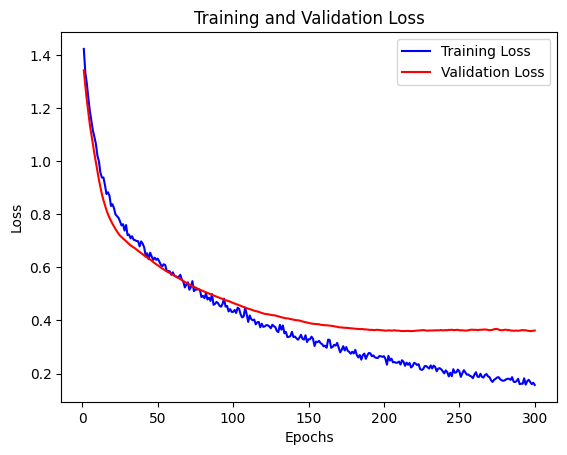

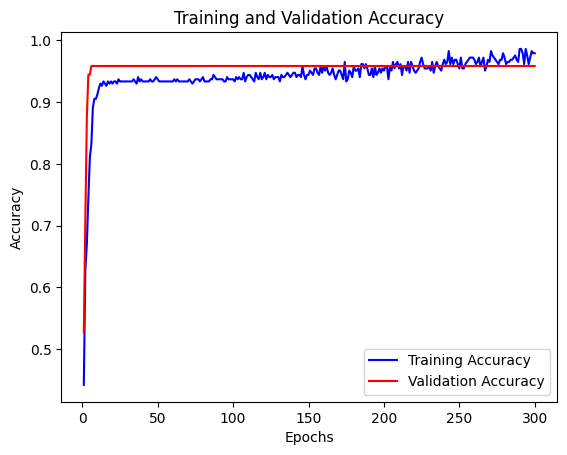

C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 6ms/step - loss: 1.0410 - accuracy: 0.9437
Loss : 1.0409822463989258
Accuracy : 0.9436619877815247
3/3 [==============================] - 0s 6ms/step


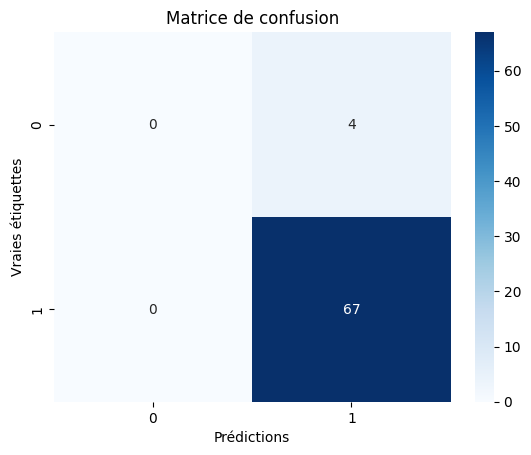

C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

Report score combiné : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.94      1.00      0.97        67

    accuracy                           0.94        71
   macro avg       0.47      0.50      0.49        71
weighted avg       0.89      0.94      0.92        71



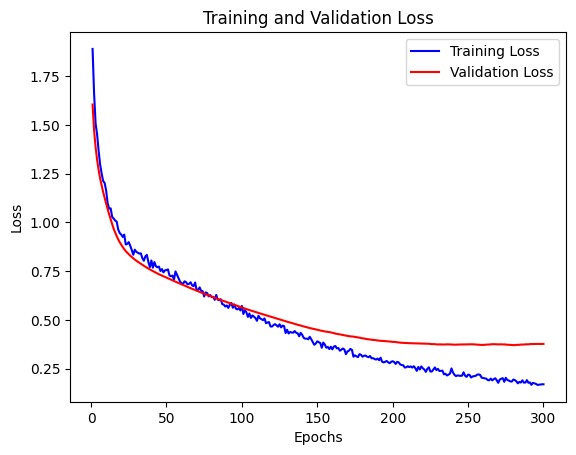

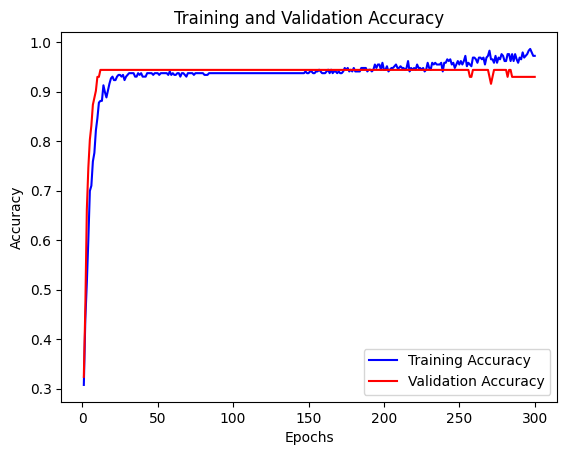

C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 6ms/step - loss: 1.0685 - accuracy: 0.9296
Loss : 1.068454384803772
Accuracy : 0.9295774698257446
3/3 [==============================] - 0s 4ms/step


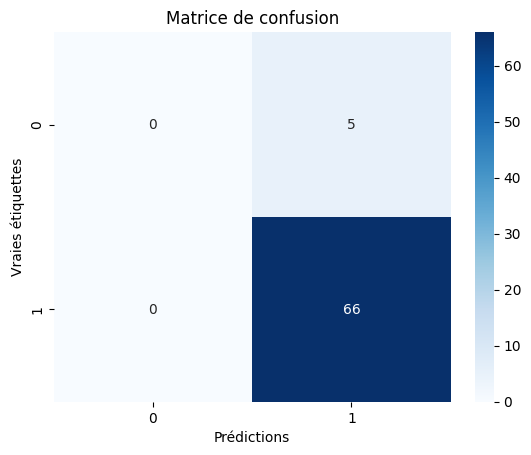

C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

Report score combiné : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.93      1.00      0.96        66

    accuracy                           0.93        71
   macro avg       0.46      0.50      0.48        71
weighted avg       0.86      0.93      0.90        71



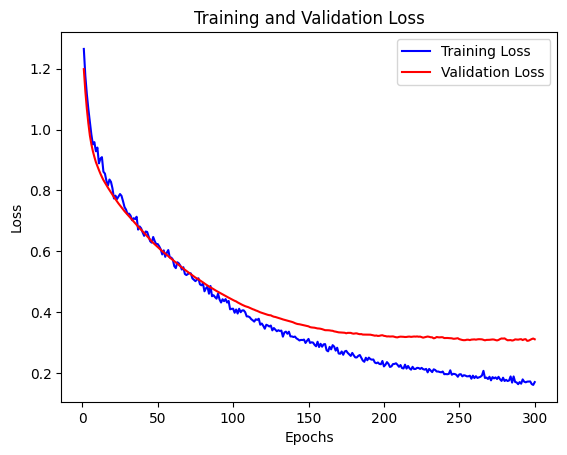

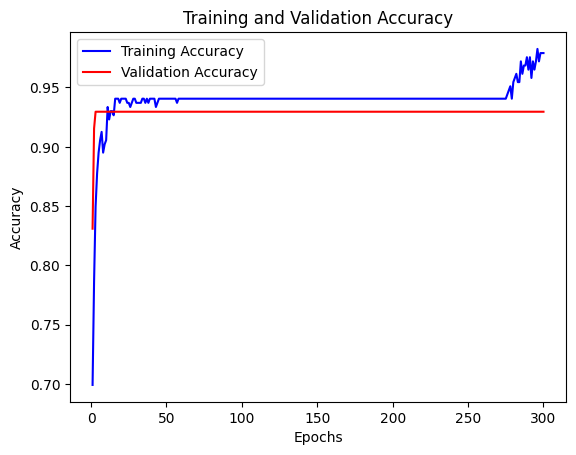

C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 6ms/step - loss: 1.1539 - accuracy: 0.9296
Loss : 1.1538950204849243
Accuracy : 0.9295774698257446
3/3 [==============================] - 0s 4ms/step


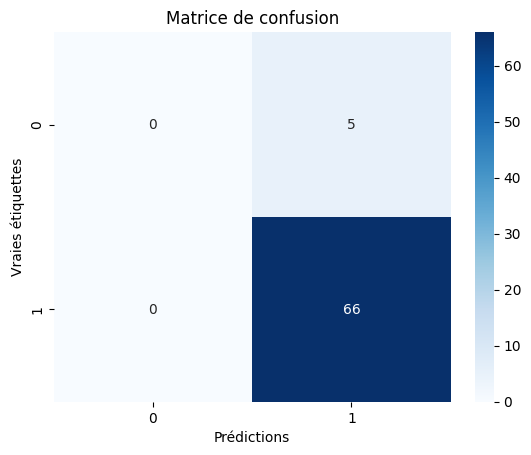

C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

Report score combiné : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.93      1.00      0.96        66

    accuracy                           0.93        71
   macro avg       0.46      0.50      0.48        71
weighted avg       0.86      0.93      0.90        71



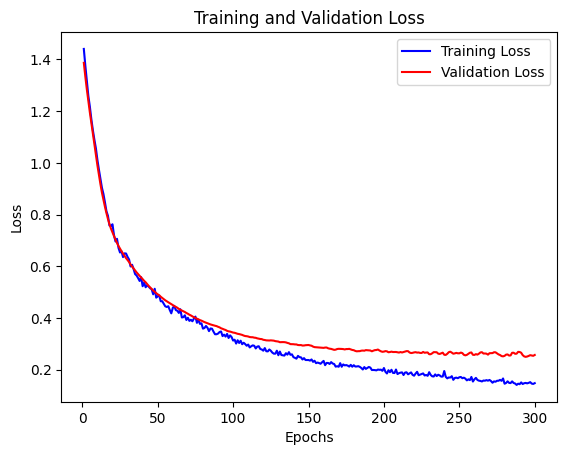

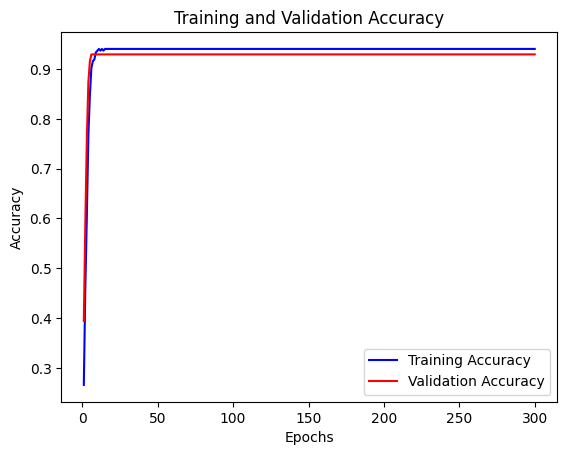

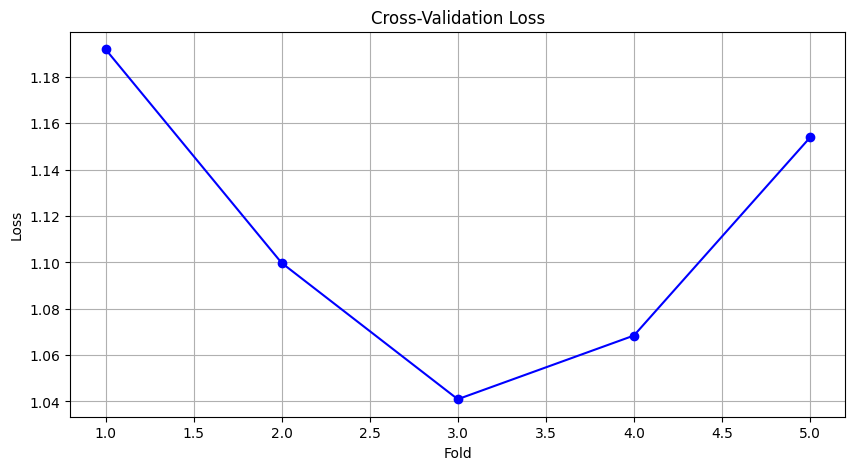

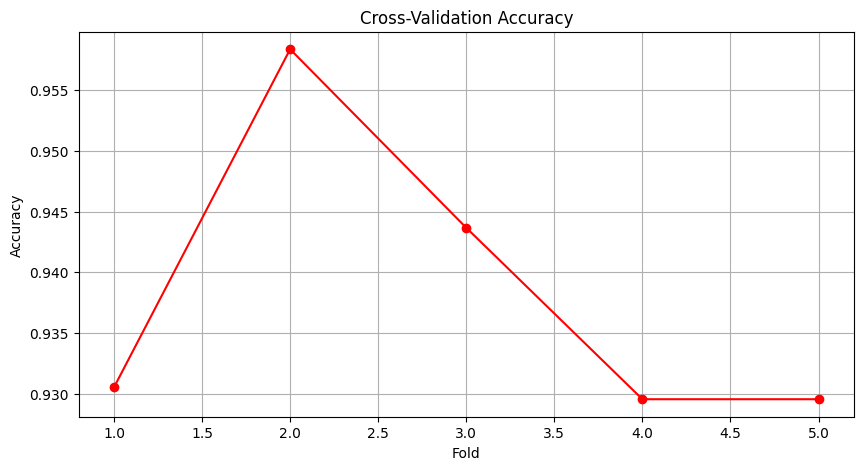


Average Loss: 1.1110180139541626
Average Accuracy: 0.9383411645889282

STD Loss: 0.05519960973491895
STD Accuracy: 0.011333288697143068


In [70]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, Adamax
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import os


#donnees = pd.read_excel('Results_v7.xlsx', sheet_name='T_set_4MS')
donnees = pd.read_excel('Results_v7_normalized_entropy.xlsx', sheet_name='T_set_4MS')
#donnees = pd.read_excel('Results_ML.xlsx')
y_score = donnees.iloc[:,3].values
y_score = y_score[~pd.isna(y_score)]
X_nom = donnees.iloc[:,0].values.reshape(-1, 1)
X_nom2 = donnees.iloc[:,1].values.reshape(-1, 1)
X_nom2 = X_nom2.astype(str)
for i in range(X_nom.shape[0]):
    X_nom[i,0] = X_nom[i,0]+"_"+X_nom2[i,0]

for i in range(len(y_score)):
    if y_score[i] != 0:
          y_score[i]=1

#for a in range(4,48):
for a in range(4,52):
        if a!=11 and a!=26 and a!=36 and a!=42:
            measure = donnees.iloc[:, a].values
            measure = measure[~pd.isna(measure)]
            X_nom = np.column_stack((X_nom, measure))
X = X_nom[:,1:]
"""speed = np.mean(X[:,[3,16]], axis=1)
X[:,3]=speed
X = np.delete(X, 16, axis=1)"""
speed = np.mean(X[:,[3,17]], axis=1)
X[:,3]=speed
X = np.delete(X, 17, axis=1)


X = X.astype(np.float32)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
#kf = KFold(n_splits=3, shuffle=True, random_state=42)

losses = []
accuracies = []

for train_index, test_index in kf.split(X):
    if os.path.exists('best_model.h5'):
        os.remove('best_model.h5')
    checkpoint = ModelCheckpoint(
        'best_model.h5',               
        monitor='val_accuracy',       
        verbose=0,                    
        save_best_only=True,         
        mode='max'                   
    )
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_score[train_index], y_score[test_index]

    # Normalisation des données
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    """# Réduction de la dimensionnalité avec PCA
    pca = PCA(n_components=9)  
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Conversion des classes de sortie en vecteurs "one-hot"
    y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=2)
    y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=2)

    # Définition du modèle du réseau de neurones
    model = Sequential([
        Dense(32, activation='relu', input_shape=(X_train_pca.shape[1],), kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(8, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])"""

    # Conversion des classes de sortie en vecteurs "one-hot"
    y_train_one_hot = to_categorical(y_train, num_classes=2)
    y_test_one_hot = to_categorical(y_test, num_classes=2)

    # Définition du modèle du réseau de neurones
    model = Sequential([
        Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(8, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    
    # Compilation du modèle
    model.compile(optimizer=Adamax(), loss='categorical_crossentropy', metrics=['accuracy'])


    # Entraînement du modèle
    history = model.fit(X_train_scaled, y_train_one_hot, epochs=300, batch_size=20, validation_data=(X_test_scaled, y_test_one_hot), callbacks=[checkpoint], verbose=0, class_weight={0: 1, 1: 1})

    # Evaluation du modèle
    model.load_weights('best_model.h5')
    model = load_model('best_model.h5')
    loss, accuracy = model.evaluate(X_test_scaled, y_test_one_hot)
    print("Loss :", loss)
    print("Accuracy :", accuracy)
    
    losses.append(loss)
    accuracies.append(accuracy)

    # Prédictions sur l'ensemble de test
    y_pred = np.argmax(model.predict(X_test_scaled), axis=1)

    # Matrice de confusion
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=["0", "1"], yticklabels=["0", "1"])
    plt.xlabel("Prédictions")
    plt.ylabel("Vraies étiquettes")
    plt.title("Matrice de confusion")
    plt.show()
    print("Report score combiné : \n",classification_report(y_test, y_pred))

    # Récupérer les valeurs de perte et d'exactitude
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(train_loss) + 1)

    # Tracer la perte
    plt.plot(epochs, train_loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Tracer l'exactitude
    plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Tracer les courbes de perte
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(losses) + 1), losses, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Loss')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Tracer les courbes d'exactitude
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', linestyle='-', color='r')
plt.title('Cross-Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Affichage des performances moyennes
print("\nAverage Loss:", np.mean(losses))
print("Average Accuracy:", np.mean(accuracies))
print("\nSTD Loss:", np.std(losses))
print("STD Accuracy:", np.std(accuracies))

In [32]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, Adamax
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import os


donnees = pd.read_excel('Results_v7.xlsx', sheet_name='T_set_4MS')
y_score = donnees.iloc[:,3].values
y_sc = donnees.iloc[:,2].values
y_sc = y_sc[~pd.isna(y_score)]
y_score = y_score[~pd.isna(y_score)]
X_nom = donnees.iloc[:,0].values.reshape(-1, 1)
dataset = np.unique(X_nom)
for a in range(2,48):
            measure = donnees.iloc[:, a].values
            measure = measure[~pd.isna(measure)]
            X_nom = np.column_stack((X_nom, measure))
cols = ['name']+[f'col{i}' for i in range(1,X_nom.shape[1])]
df = pd.DataFrame(X_nom, columns=cols)
grouped_df = df.groupby('name').mean().reset_index()
result = grouped_df.values.tolist()
# Afficher le résultat
for i in range(len(result)):
        result[i][1]=int(result[i][1])
        result[i][2]=int(result[i][2])
df_result = pd.DataFrame(result, columns=cols)

# Exporter vers un fichier Excel
excel_filename = 'Results_ML.xlsx'
df_result.to_excel(excel_filename, index=False)

# Afficher le résultat
for i in range(len(result)):
        result[i][1]=int(result[i][1])
        result[i][2]=int(result[i][2])
        

    
